# Finding the temporal autocorrelation order and evidence of slope
This notebook fits an ARIMA model for ADPE at CROZIER

In [777]:
# Load libraries
library(forecast); library(ggplot2);library(dplyr); library(fmsb); library(stats); library(ggplot2); library(modelr); library(lmtest); library(pdp)

In [778]:
# Load the data
master<-read.csv("~/Workspace/Anthropocene/data/MASTER_SIE_MOD.csv")

In [779]:
head(master)


,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,intP_MCM,mnChl_aw_MCM,mnOW_MCM,nmSST_aw_MCM,mnAirTemp,⋯,ICEBERG,ADPE_BIRD,ADPE_CROZ,ADPE_RO,BIRD,EMPE,WESE,WESE_1,av_SIE,FIE
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1998,0.6511596,1.161487,250157,-0.690398,0.7170871,1.2969463,4370.76,-0.758259,-5.650,⋯,0,38252,125441,34110,38252,1108,0.6388527,NA,3.126,17.2
2,1999,0.6556949,1.353060,218399,-0.901666,0.7196705,1.5053741,4127.91,-0.926631,-5.900,⋯,0,47350,156441,36200,47350,798,0.6505867,NA,3.269,31.0
3,2000,0.5873935,1.098477,200943,-0.924639,0.3527637,0.6385173,2959.68,-1.109230,-4.450,⋯,0,41409,89489,23630,41409,1201,0.6219035,1.05,2.983,37.2
4,2001,0.7697252,1.460241,250135,-0.645706,1.0612940,3.1205994,4366.66,-0.911519,-6.175,⋯,1,26317,67114,13670,26317,0,0.5084746,0.75,2.964,15.0
5,2002,0.2079730,0.311760,100918,-1.117230,0.1219010,0.1905980,1748.01,-1.109550,-6.050,⋯,1,40678,161079,22390,40678,247,0.5345502,0.80,2.779,44.9
6,2003,0.6588100,1.278130,190735,-1.047010,0.1797500,0.2424260,2701.45,-1.177640,-4.625,⋯,1,22816,100843,19630,22816,279,0.5084746,0.78,2.859,52.0


In [780]:
#calculating the annual percentage change for ADPE_CROZ
master_gr <- master %>% mutate(growth_croz=log(ADPE_CROZ/lag(ADPE_CROZ)))
master_gr$growth_croz<-ifelse(is.na(master_gr$growth_croz),0,master_gr$growth_croz)
master_gr[1,"growth_croz"]<--0.2011873


#taking out years before 2003#
master_gr <- subset(master_gr, !year %in% c(1998:2002))


In [781]:
#taking out iceberg years#
master_gr1 <- subset(master_gr, !year %in% c(2001:2005))

# Including LAGS

In [782]:
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6

In [783]:
#lag 5 years SIE
master_gr <- master_gr %>% mutate(SIE_lag5 = lag(av_SIE,5))
master_gr[5,"SIE_lag5"]<-2.703
master_gr[4,"SIE_lag5"]<-3.123
master_gr[3,"SIE_lag5"]<-2.731
master_gr[2,"SIE_lag5"]<-2.767
master_gr[1,"SIE_lag5"]<-2.60

#lag 4 years SIE
master_gr <- master_gr %>% mutate(SIE_lag4 = lag(av_SIE,4))
master_gr[4,"SIE_lag4"]<-2.703
master_gr[3,"SIE_lag4"]<-3.123
master_gr[2,"SIE_lag4"]<-2.731
master_gr[1,"SIE_lag4"]<-2.767


#lag 4 years Gyre
master_gr <- master_gr %>% mutate(GyreSPD_lag4 = lag(GyreSPD,4))
master_gr[4,"GyreSPD_lag4"]<-6.2
master_gr[3,"GyreSPD_lag4"]<-6.3
master_gr[2,"GyreSPD_lag4"]<-5.7
master_gr[1,"GyreSPD_lag4"]<-5.8

#lag 5 years Gyre
master_gr <- master_gr %>% mutate(GyreSPD_lag5 = lag(GyreSPD,5))
master_gr[5,"GyreSPD_lag5"]<-6.2
master_gr[4,"GyreSPD_lag5"]<-6.3
master_gr[3,"GyreSPD_lag5"]<-5.7
master_gr[2,"GyreSPD_lag5"]<-5.8
master_gr[1,"GyreSPD_lag5"]<-5.0

#lag 5 years Air Temp
master_gr <- master_gr %>% mutate(mnAirTemp_lag5 = lag(mnAirTemp,5))
master_gr[5,"mnAirTemp_lag5"]<--5.6
master_gr[4,"mnAirTemp_lag5"]<--4.5
master_gr[3,"mnAirTemp_lag5"]<--5.2
master_gr[2,"mnAirTemp_lag5"]<--7.7
master_gr[1,"mnAirTemp_lag5"]<--4.2

#lag 4 years Air Temp
master_gr <- master_gr %>% mutate(mnAirTemp_lag4 = lag(mnAirTemp,4))
master_gr[4,"mnAirTemp_lag4"]<--5.6
master_gr[3,"mnAirTemp_lag4"]<--4.5
master_gr[2,"mnAirTemp_lag4"]<--5.2
master_gr[1,"mnAirTemp_lag4"]<--7.7

#lag 5 years SST
master_gr <- master_gr %>% mutate(nmSST_aw_RSP_lag5 = lag(nmSST_aw_RSP,5))
master_gr[5,"nmSST_aw_RSP_lag5"]<--1.11723
master_gr[4,"nmSST_aw_RSP_lag5"]<--0.645706
master_gr[3,"nmSST_aw_RSP_lag5"]<--0.924639
master_gr[2,"nmSST_aw_RSP_lag5"]<--0.901666
master_gr[1,"nmSST_aw_RSP_lag5"]<--0.690398

#lag 4 years SST
master_gr <- master_gr %>% mutate(nmSST_aw_RSP_lag4 = lag(nmSST_aw_RSP,4))
master_gr[4,"nmSST_aw_RSP_lag4"]<--1.11723
master_gr[3,"nmSST_aw_RSP_lag4"]<--0.645706
master_gr[2,"nmSST_aw_RSP_lag4"]<--0.924639
master_gr[1,"nmSST_aw_RSP_lag4"]<--0.901666

#lag 5 years Wind
master_gr <- master_gr %>% mutate(mnWind_lag5 = lag(mnWind,5))
master_gr[5,"mnWind_lag5"]<-8.8
master_gr[4,"mnWind_lag5"]<-8.6
master_gr[3,"mnWind_lag5"]<-7.8
master_gr[2,"mnWind_lag5"]<-7.8
master_gr[1,"mnWind_lag5"]<-7.8

#lag 4 years Wind
master_gr <- master_gr %>% mutate(mnWind_lag4 = lag(mnWind,4))
master_gr[4,"mnWind_lag4"]<-8.8
master_gr[3,"mnWind_lag4"]<-8.6
master_gr[2,"mnWind_lag4"]<-7.8
master_gr[1,"mnWind_lag4"]<-7.8

#mnOW_RSP6
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6

#lag 5 years mnOW_RSP6
master_gr <- master_gr %>% mutate(mnOW_RSP6_lag5 = lag(mnOW_RSP6,5))
master_gr[5,"mnOW_RSP6_lag5"]<-100918/10^6
master_gr[4,"mnOW_RSP6_lag5"]<-250135/10^6
master_gr[3,"mnOW_RSP6_lag5"]<-200943/10^6
master_gr[2,"mnOW_RSP6_lag5"]<-218399/10^6
master_gr[1,"mnOW_RSP6_lag5"]<-250157/10^6

#lag 4 years mnOW_RSP6
master_gr <- master_gr %>% mutate(mnOW_RSP6_lag4 = lag(mnOW_RSP6,4))
master_gr[4,"mnOW_RSP6_lag4"]<-100918/10^6
master_gr[3,"mnOW_RSP6_lag4"]<-250135/10^6
master_gr[2,"mnOW_RSP6_lag4"]<-200943/10^6
master_gr[1,"mnOW_RSP6_lag4"]<-218399/10^6

#lag 4 years OW_days_RSP
master_gr <- master_gr %>% mutate(OW_day_RSPlag4 = lag(OW_day_RSP,4))
master_gr[4,"OW_day_RSPlag4"]<-9
master_gr[3,"OW_day_RSPlag4"]<-2
master_gr[2,"OW_day_RSPlag4"]<-4
master_gr[1,"OW_day_RSPlag4"]<-8

#lag 4 years OW_days_MCM
master_gr <- master_gr %>% mutate(OW_day_MCMlag4 = lag(logOW_day_MCM,4))
master_gr[4,"OW_day_MCMlag4"]<-5.308267697
master_gr[3,"OW_day_MCMlag4"]<-4.912654886
master_gr[2,"OW_day_MCMlag4"]<-5.209486153
master_gr[1,"OW_day_MCMlag4"]<-5.220355825


In [784]:
master_gr;summary(master_gr$growth_croz); summary(master_gr$mnOW_RSP)

year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,intP_MCM,mnChl_aw_MCM,mnOW_MCM,nmSST_aw_MCM,mnAirTemp,⋯,mnAirTemp_lag5,mnAirTemp_lag4,nmSST_aw_RSP_lag5,nmSST_aw_RSP_lag4,mnWind_lag5,mnWind_lag4,mnOW_RSP6_lag5,mnOW_RSP6_lag4,OW_day_RSPlag4,OW_day_MCMlag4
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2003,0.658810,1.278130,190735,-1.047010,0.1797500,0.2424260,2701.45,-1.177640,-4.625,⋯,-4.200,-7.700,-0.690398,-0.901666,7.8,7.8,0.250157,0.218399,8,5.220356
2004,0.659537,1.201000,268734,-0.546599,0.0595893,0.0920093,1115.63,-1.394120,-5.000,⋯,-7.700,-5.200,-0.901666,-0.924639,7.8,7.8,0.218399,0.200943,4,5.209486
2005,0.617897,1.116710,236044,-0.551816,0.2451990,0.5341190,3630.16,-1.099050,-5.250,⋯,-5.200,-4.500,-0.924639,-0.645706,7.8,8.6,0.200943,0.250135,2,4.912655
2006,0.673591,1.344420,218199,-0.970962,0.3927390,0.5908280,4718.94,-0.954533,-6.000,⋯,-4.500,-5.600,-0.645706,-1.117230,8.6,8.8,0.250135,0.100918,9,5.308268
2007,0.543325,1.170400,188097,-1.006890,0.3533950,0.6396110,3903.53,-1.064650,-6.800,⋯,-5.600,-4.625,-1.117230,-1.047010,8.8,8.6,0.100918,0.190735,12,0.000000
2008,0.525248,0.962226,241795,-0.846050,0.2566900,0.5890600,1968.25,-1.173800,-5.025,⋯,-4.625,-5.000,-1.047010,-0.546599,8.6,8.4,0.190735,0.268734,2,4.644391
2009,0.739713,1.811370,227884,-0.983647,0.4709990,1.1855100,5003.04,-0.939651,-5.475,⋯,-5.000,-5.250,-0.546599,-0.551816,8.4,8.8,0.268734,0.236044,3,5.407172
2010,0.658263,1.361110,254659,-0.702852,0.6655190,1.6221900,4676.62,-0.910408,-4.800,⋯,-5.250,-6.000,-0.551816,-0.970962,8.8,8.8,0.236044,0.218199,6,5.192957
2011,0.530627,0.988240,238928,-1.043260,0.3446910,0.5803630,3446.75,-1.145310,-4.475,⋯,-6.000,-6.800,-0.970962,-1.006890,8.8,9.4,0.218199,0.188097,17,5.262690


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.46833 -0.02230  0.02294  0.03899  0.06346  0.59314 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 184900  222560  237276  232401  248050  268734       1 

# Quadratic variables

In [785]:
master_gr$av_SIE_2<- master_gr$av_SIE^2
master_gr$SIE_lag4_2<- master_gr$SIE_lag4^2
master_gr$SIE_lag5_2<- master_gr$SIE_lag5^2
master_gr$mnOW_RSP6<- master_gr$mnOW_RSP/10^6
master_gr$mnOW_RSP6_2<-master_gr$mnOW_RSP6^2
master_gr$mnOW_RSP6_lag4_2<-master_gr$mnOW_RSP6_lag4^2
master_gr$mnOW_RSP6_lag5_2<-master_gr$mnOW_RSP6_lag5^2
master_gr$mnChl_aw_RSP_2<-master_gr$mnChl_aw_RSP^2
master_gr$nmSST_aw_RSP_2<-master_gr$nmSST_aw_RSP^2
master_gr$nmSST_aw_RSP_lag4_2<-master_gr$nmSST_aw_RSP_lag4^2
master_gr$nmSST_aw_RSP_lag5_2<-master_gr$nmSST_aw_RSP_lag5^2
master_gr$mnWind_2<-master_gr$mnWind^2
master_gr$mnWind_lag4_2<-master_gr$mnWind_lag4^2
master_gr$mnWind_lag5_2<-master_gr$mnWind_lag5^2
master_gr$GyreSPD_2<-master_gr$GyreSPD^2
master_gr$GyreSPD_lag4_2<-master_gr$GyreSPD_lag4^2
master_gr$GyreSPD_lag5_2<-master_gr$GyreSPD_lag5^2
master_gr$Salinity_2<-master_gr$Salinity^2
master_gr$intP_RSP_2<-master_gr$intP_RSP^2
master_gr$Prop._134_2<-master_gr$Prop._134^2
master_gr$TOTALTonnes.100_2<-master_gr$TOTALTonnes.100^2
master_gr$mnSIE_2<- master_gr$mnSIE^2
master_gr$mnAirTemp_2<- master_gr$mnAirTemp^2
master_gr$mnAirTemp_lag4_2<- master_gr$mnAirTemp_lag4^2
master_gr$mnAirTemp_lag5_2<- master_gr$mnAirTemp_lag5^2
master_gr$logOW_day_MCM_2<- master_gr$logOW_day_MCM^2
master_gr$OW_day_MCMlag4_2<- master_gr$OW_day_MCMlag4^2
master_gr$OW_day_RSPlag4_2<- master_gr$OW_day_RSPlag4^2
master_gr$OW_day_RSP_2<- master_gr$OW_day_RSP^2

In [786]:
head(master_gr)

,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,intP_MCM,mnChl_aw_MCM,mnOW_MCM,nmSST_aw_MCM,mnAirTemp,⋯,Prop._134_2,TOTALTonnes.100_2,mnSIE_2,mnAirTemp_2,mnAirTemp_lag4_2,mnAirTemp_lag5_2,logOW_day_MCM_2,OW_day_MCMlag4_2,OW_day_RSPlag4_2,OW_day_RSP_2
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2003,0.658810,1.278130,190735,-1.047010,0.1797500,0.2424260,2701.45,-1.177640,-4.625,⋯,3025,201.0923,8.173881,21.39062,59.29000,17.64000,0.00000,27.25211,64,144
2,2004,0.659537,1.201000,268734,-0.546599,0.0595893,0.0920093,1115.63,-1.394120,-5.000,⋯,1225,426.2491,7.612081,25.00000,27.04000,59.29000,21.57037,27.13875,16,4
3,2005,0.617897,1.116710,236044,-0.551816,0.2451990,0.5341190,3630.16,-1.099050,-5.250,⋯,1444,1125.8508,8.020224,27.56250,20.25000,27.04000,29.23751,24.13418,4,9
4,2006,0.673591,1.344420,218199,-0.970962,0.3927390,0.5908280,4718.94,-0.954533,-6.000,⋯,2025,729.6968,7.496644,36.00000,31.36000,20.25000,26.96680,28.17771,81,36
5,2007,0.543325,1.170400,188097,-1.006890,0.3533950,0.6396110,3903.53,-1.064650,-6.800,⋯,1764,814.4232,9.771876,46.24000,21.39062,31.36000,27.69591,0.00000,144,289
6,2008,0.525248,0.962226,241795,-0.846050,0.2566900,0.5890600,1968.25,-1.173800,-5.025,⋯,1681,500.7257,10.029889,25.25063,25.00000,21.39062,28.84375,21.57037,4,64


# Table excluiding year 2002 to test CHL and PP (because values for that year were probably wrong due the iceberg)

In [787]:
# remove row 5 (year 2002)
testChl <- master_gr [-c(5),]

In [788]:
head(testChl)

,year,intP_RSP,mnChl_aw_RSP,mnOW_RSP,nmSST_aw_RSP,intP_MCM,mnChl_aw_MCM,mnOW_MCM,nmSST_aw_MCM,mnAirTemp,⋯,Prop._134_2,TOTALTonnes.100_2,mnSIE_2,mnAirTemp_2,mnAirTemp_lag4_2,mnAirTemp_lag5_2,logOW_day_MCM_2,OW_day_MCMlag4_2,OW_day_RSPlag4_2,OW_day_RSP_2
,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2003,0.658810,1.278130,190735,-1.047010,0.1797500,0.2424260,2701.45,-1.177640,-4.625,⋯,3025,201.0923,8.173881,21.39062,59.2900,17.64000,0.00000,27.25211,64,144
2,2004,0.659537,1.201000,268734,-0.546599,0.0595893,0.0920093,1115.63,-1.394120,-5.000,⋯,1225,426.2491,7.612081,25.00000,27.0400,59.29000,21.57037,27.13875,16,4
3,2005,0.617897,1.116710,236044,-0.551816,0.2451990,0.5341190,3630.16,-1.099050,-5.250,⋯,1444,1125.8508,8.020224,27.56250,20.2500,27.04000,29.23751,24.13418,4,9
4,2006,0.673591,1.344420,218199,-0.970962,0.3927390,0.5908280,4718.94,-0.954533,-6.000,⋯,2025,729.6968,7.496644,36.00000,31.3600,20.25000,26.96680,28.17771,81,36
6,2008,0.525248,0.962226,241795,-0.846050,0.2566900,0.5890600,1968.25,-1.173800,-5.025,⋯,1681,500.7257,10.029889,25.25063,25.0000,21.39062,28.84375,21.57037,4,64
7,2009,0.739713,1.811370,227884,-0.983647,0.4709990,1.1855100,5003.04,-0.939651,-5.475,⋯,1764,503.3786,9.431041,29.97562,27.5625,25.00000,24.56022,29.23751,9,9


# Plot variables over TIME


In [789]:
theme_set(theme_bw())

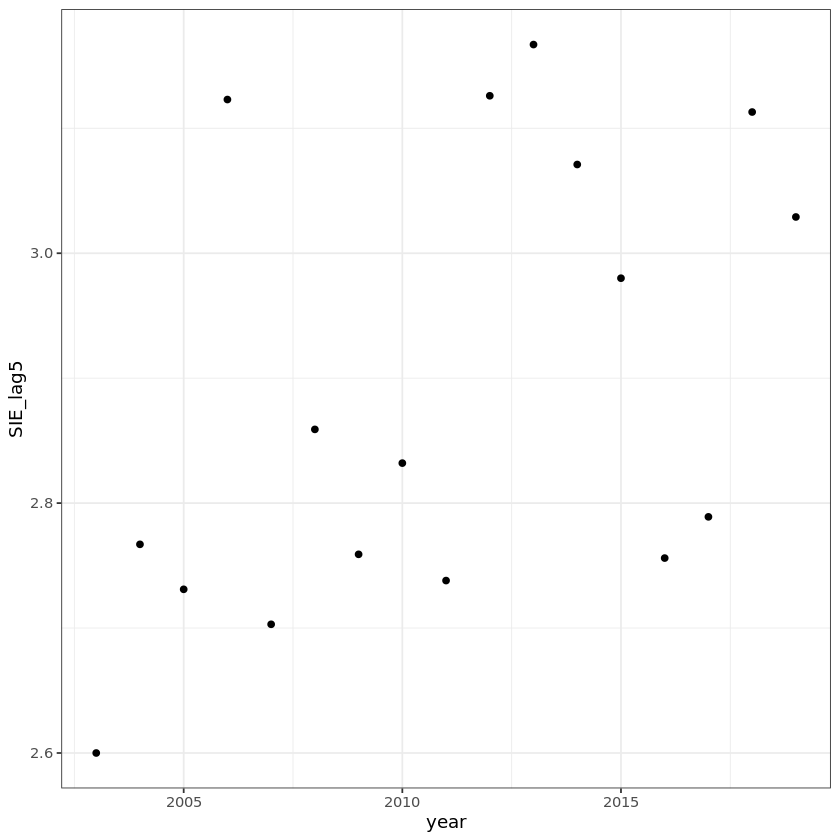

In [790]:
ggplot(master_gr,aes(x=year,y=SIE_lag5)) + geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


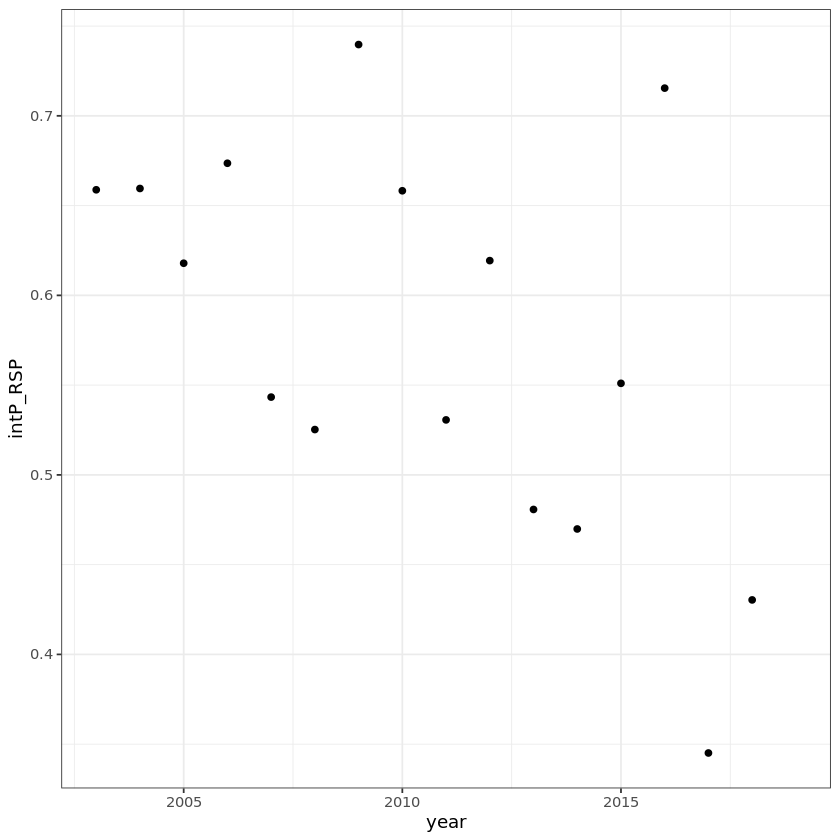

In [791]:
ggplot(master_gr,aes(x=year,y=intP_RSP)) + geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


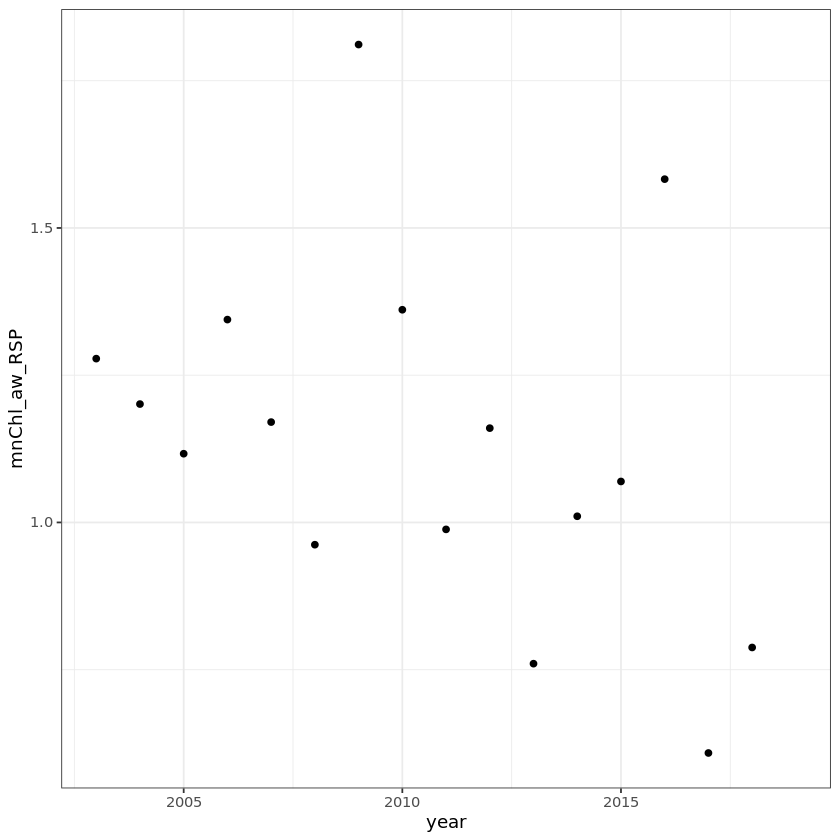

In [792]:
ggplot(master_gr,aes(x=year,y=mnChl_aw_RSP)) + geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


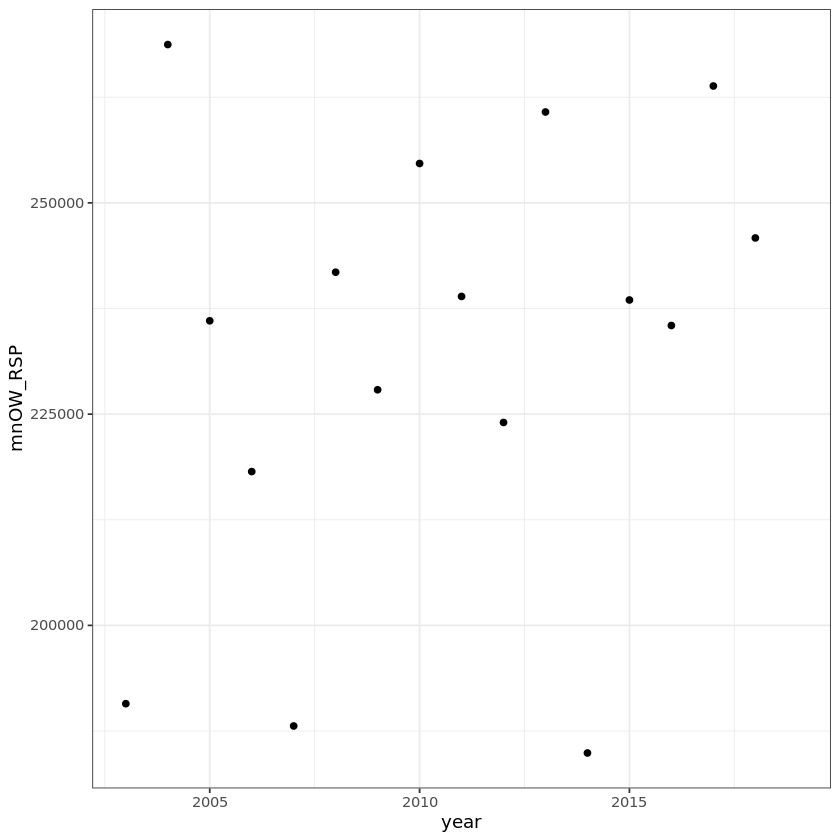

In [793]:
ggplot(master_gr,aes(x=year,y=mnOW_RSP)) + geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


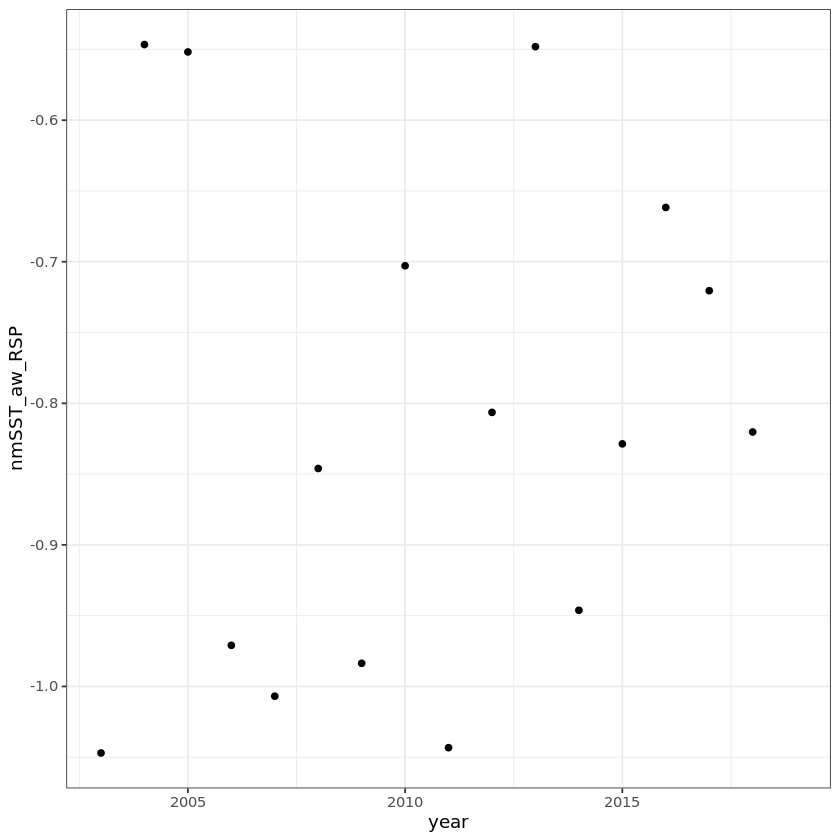

In [794]:
ggplot(master_gr,aes(x=year,y=nmSST_aw_RSP)) + geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


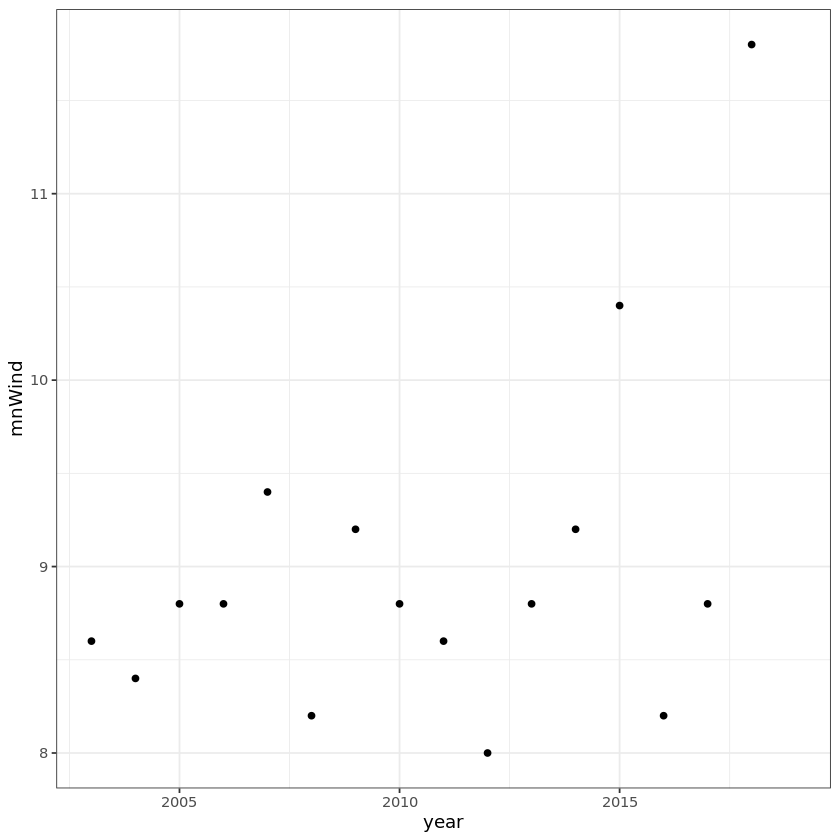

In [795]:
ggplot(master_gr,aes(x=year,y=mnWind)) + geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


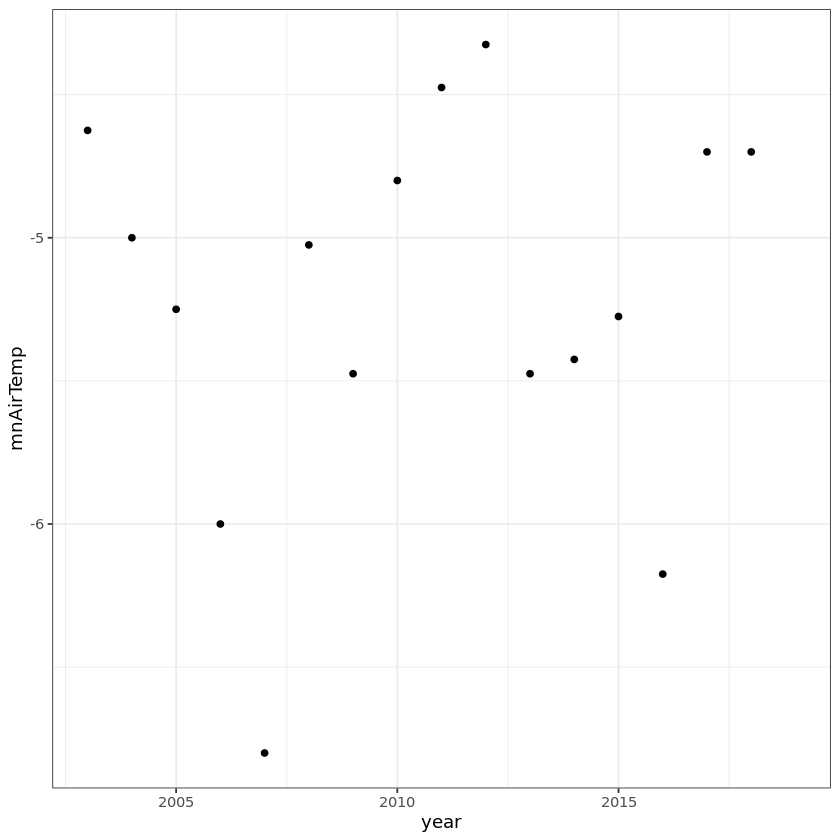

In [796]:
ggplot(master_gr,aes(x=year,y=mnAirTemp)) + geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


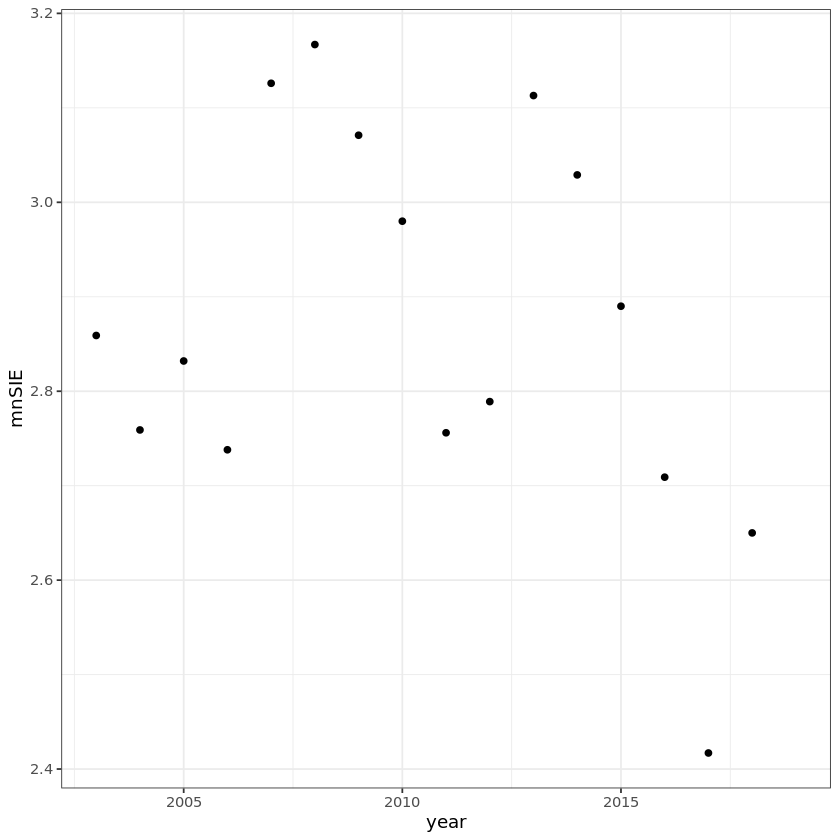

In [797]:
ggplot(master_gr,aes(x=year,y=mnSIE)) + geom_point()

Warning message:
“Removed 2 rows containing missing values (geom_point).”


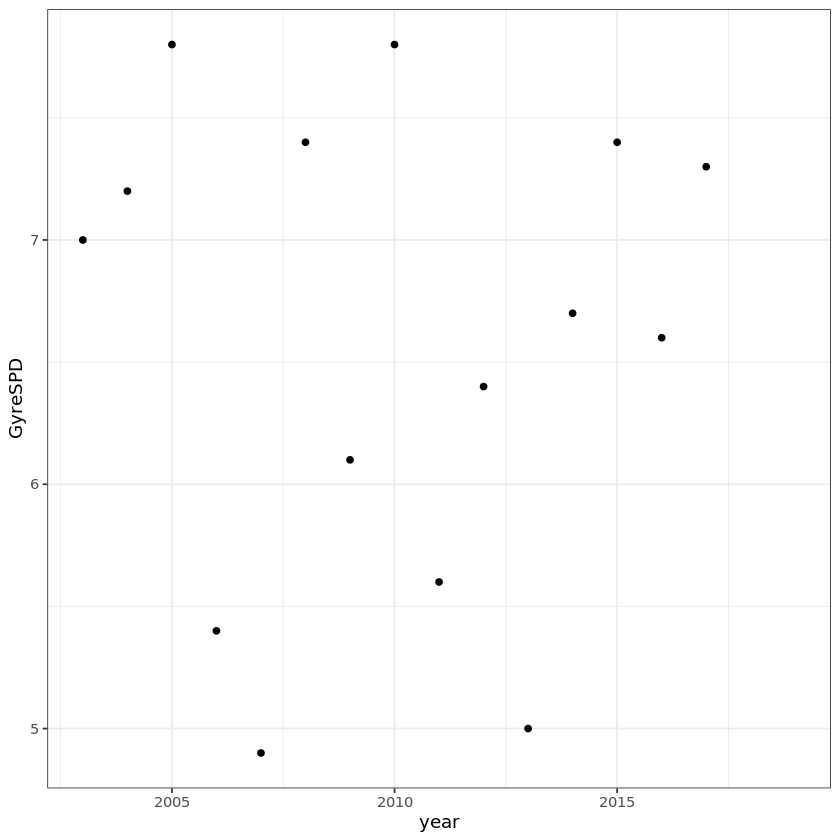

In [798]:
ggplot(master_gr,aes(x=year,y=GyreSPD)) + geom_point()

Warning message:
“Removed 5 rows containing missing values (geom_point).”


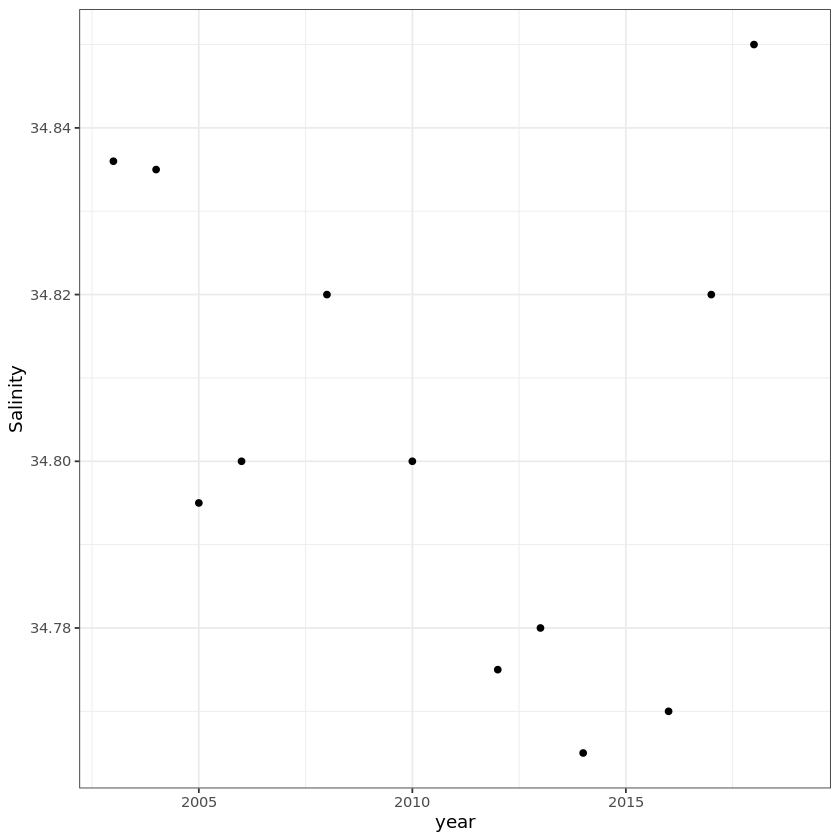

In [799]:
ggplot(master_gr,aes(x=year,y=Salinity)) + geom_point()

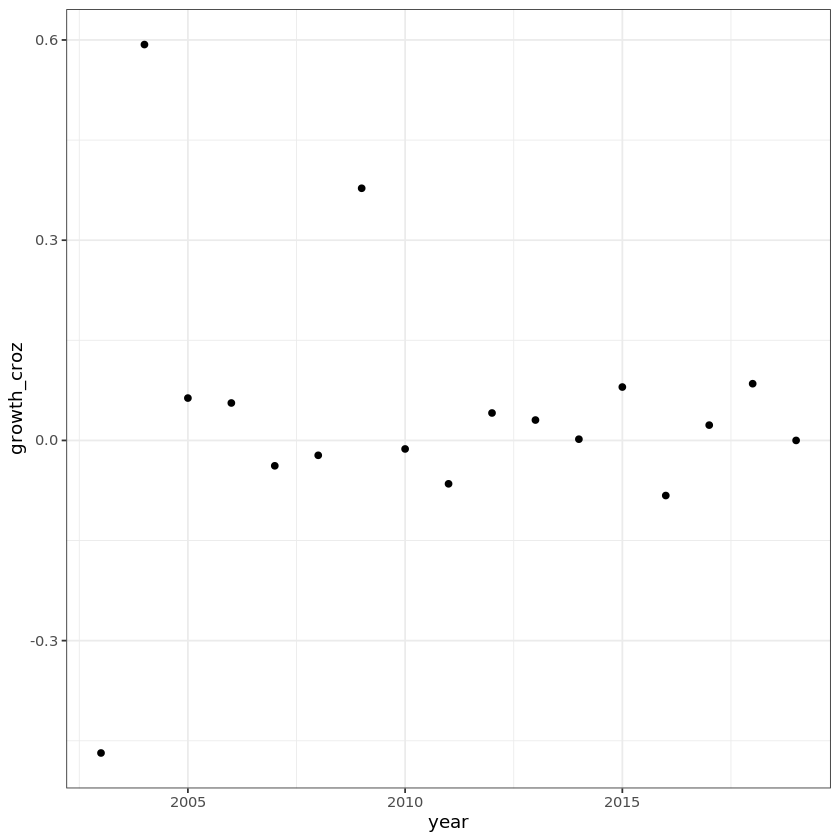

In [800]:
ggplot(master_gr,aes(x=year,y=growth_croz)) + geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


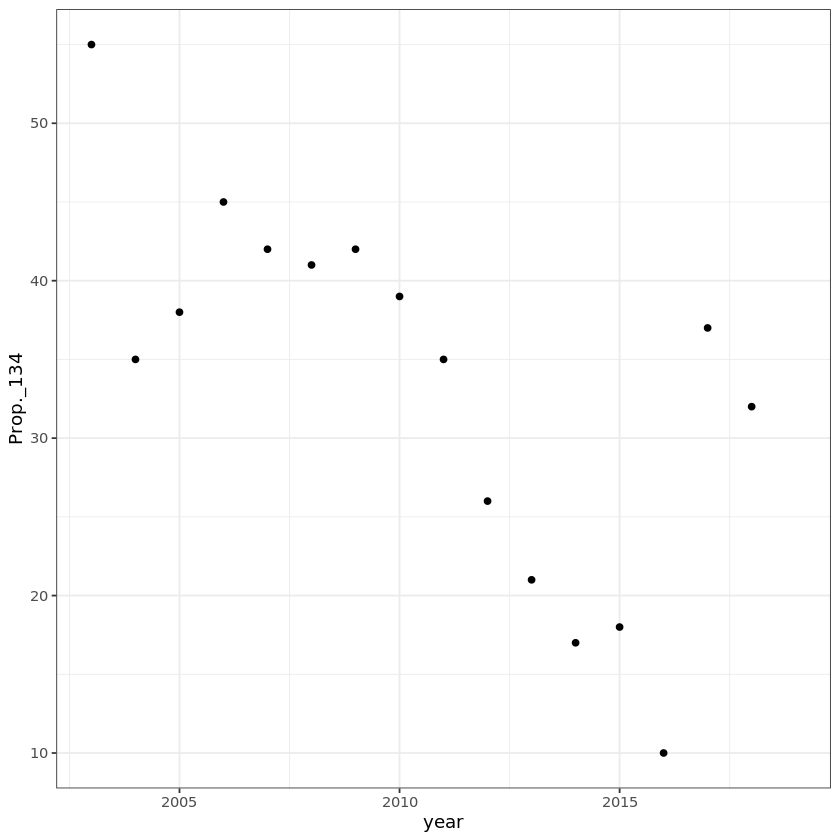

In [801]:
ggplot(master_gr,aes(x=year,y=Prop._134)) + geom_point()

Warning message:
“Removed 1 rows containing missing values (geom_point).”


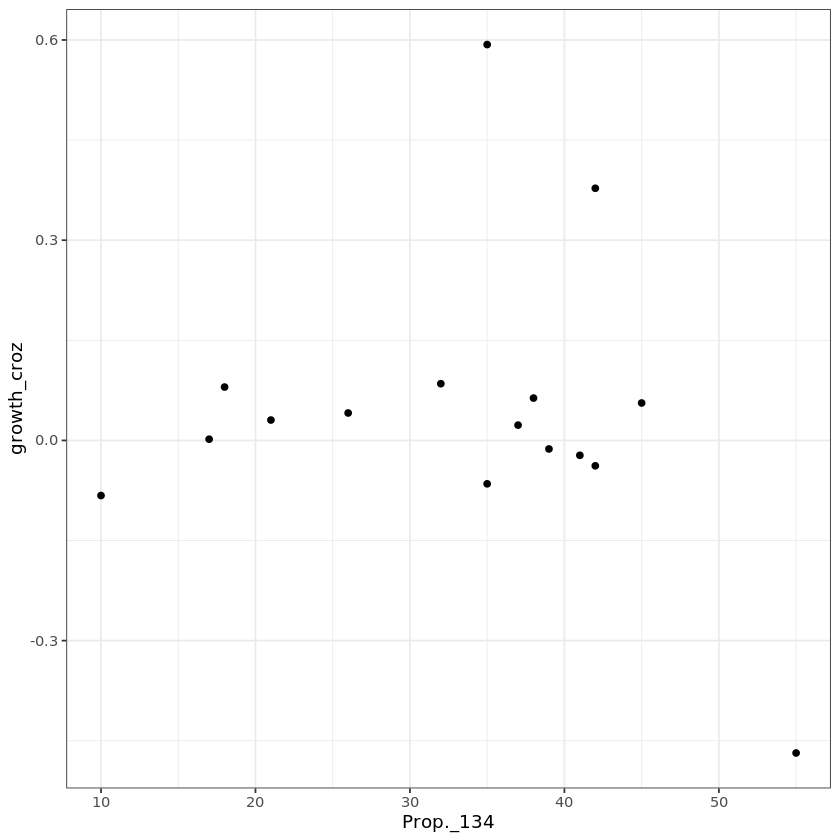

In [802]:
ggplot(master_gr,aes(x=Prop._134,y=growth_croz)) + geom_point()

# "in_frame": dataframe only with env. variables (TO USE FOR VIF)
# NO ICEBERG

In [803]:
in_frame <- master_gr %>% select (intP_RSP:mnChl_aw_RSP, nmSST_aw_RSP:GyreSPD, Salinity, mnOW_RSP6:SIE_lag5)

In [804]:
head(in_frame)

,intP_RSP,mnChl_aw_RSP,nmSST_aw_RSP,intP_MCM,mnChl_aw_MCM,mnOW_MCM,nmSST_aw_MCM,mnAirTemp,mnWind,mnSIE,OW_day_RSP,logOW_day_MCM,GyreSPD,Salinity,mnOW_RSP6,SIE_lag5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.658810,1.278130,-1.047010,0.1797500,0.2424260,2701.45,-1.177640,-4.625,8.6,2.859,12,0.000000,7.0,34.836,0.190735,2.600
2,0.659537,1.201000,-0.546599,0.0595893,0.0920093,1115.63,-1.394120,-5.000,8.4,2.759,2,4.644391,7.2,34.835,0.268734,2.767
3,0.617897,1.116710,-0.551816,0.2451990,0.5341190,3630.16,-1.099050,-5.250,8.8,2.832,3,5.407172,7.8,34.795,0.236044,2.731
4,0.673591,1.344420,-0.970962,0.3927390,0.5908280,4718.94,-0.954533,-6.000,8.8,2.738,6,5.192957,5.4,34.800,0.218199,3.123
5,0.543325,1.170400,-1.006890,0.3533950,0.6396110,3903.53,-1.064650,-6.800,9.4,3.126,17,5.262690,4.9,NA,0.188097,2.703
6,0.525248,0.962226,-0.846050,0.2566900,0.5890600,1968.25,-1.173800,-5.025,8.2,3.167,8,5.370638,7.4,34.820,0.241795,2.859


# test without 2002

In [805]:
in_frame2002 <- testChl %>% select (intP_RSP:mnChl_aw_RSP, nmSST_aw_RSP:GyreSPD, Salinity, mnOW_RSP6:SIE_lag5)

# ARIMA

In [806]:
#I included the trace function to understand the combination of p,d,q that arima checked to select the best model#
amdl<-auto.arima(master_gr$growth_croz,ic="aic", trace=TRUE)


 ARIMA(2,0,2) with non-zero mean : Inf
 ARIMA(0,0,0) with non-zero mean : -1.384252
 ARIMA(1,0,0) with non-zero mean : -4.529586
 ARIMA(0,0,1) with non-zero mean : -6.166314
 ARIMA(0,0,0) with zero mean     : -2.788807
 ARIMA(1,0,1) with non-zero mean : -4.23597
 ARIMA(0,0,2) with non-zero mean : Inf
 ARIMA(1,0,2) with non-zero mean : Inf
 ARIMA(0,0,1) with zero mean     : -3.662478

 Best model: ARIMA(0,0,1) with non-zero mean 



In [807]:
#checking best model
mdl1<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=T)
summary(mdl1)

Series: master_gr$growth_croz 
ARIMA(1,0,0) with drift 

Coefficients:
          ar1   drift
      -0.4919  0.0031
s.e.   0.2439  0.0031

sigma^2 estimated as 0.03936:  log likelihood=4.3
AIC=-2.6   AICc=-0.76   BIC=-0.1

Training set error measures:
                     ME      RMSE       MAE  MPE MAPE      MASE         ACF1
Training set 0.02206329 0.1863614 0.1299614 -Inf  Inf 0.6518501 -0.005703827



	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with drift
Q* = 6.3256, df = 3, p-value = 0.0968

Model df: 2.   Total lags used: 5



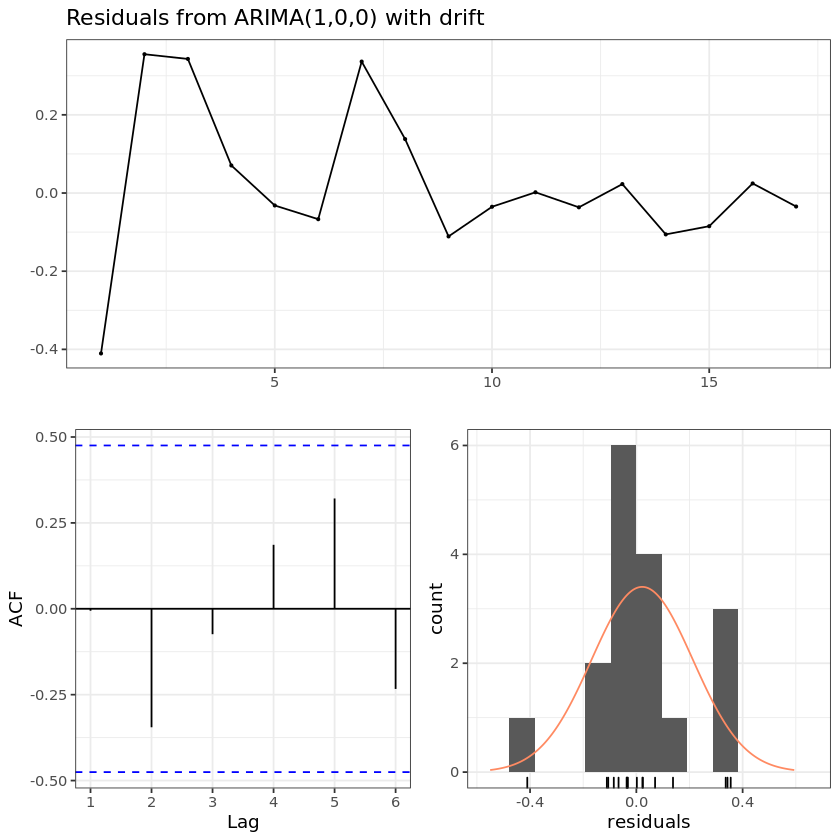

In [808]:
checkresiduals(mdl1)

In [809]:
# Compare to:
mdl1a<-Arima(master_gr$growth_croz,order=c(2,0,0),include.mean=F,include.drift=T)
summary(mdl1a)

Series: master_gr$growth_croz 
ARIMA(2,0,0) with drift 

Coefficients:
          ar1      ar2   drift
      -0.5079  -0.2469  0.0030
s.e.   0.2489   0.3604  0.0026

sigma^2 estimated as 0.04097:  log likelihood=4.53
AIC=-1.06   AICc=2.27   BIC=2.27

Training set error measures:
                     ME      RMSE       MAE  MPE MAPE      MASE        ACF1
Training set 0.02739753 0.1836951 0.1272164 -Inf  Inf 0.6380823 -0.02928708



	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with drift
Q* = 4.6634, df = 3, p-value = 0.1982

Model df: 3.   Total lags used: 6



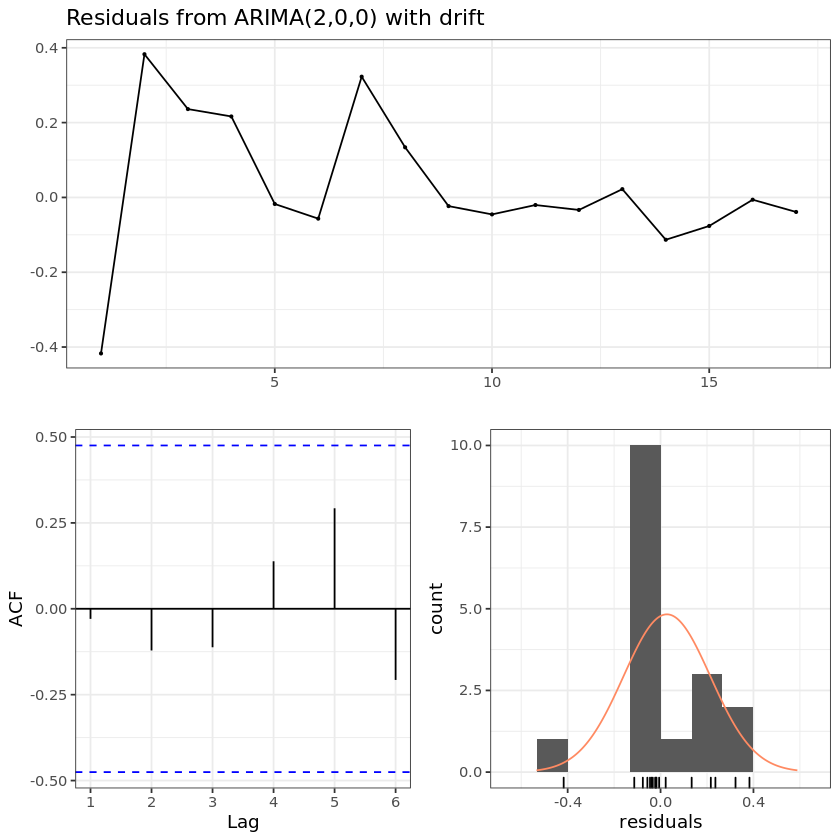

In [810]:
checkresiduals(mdl1a)

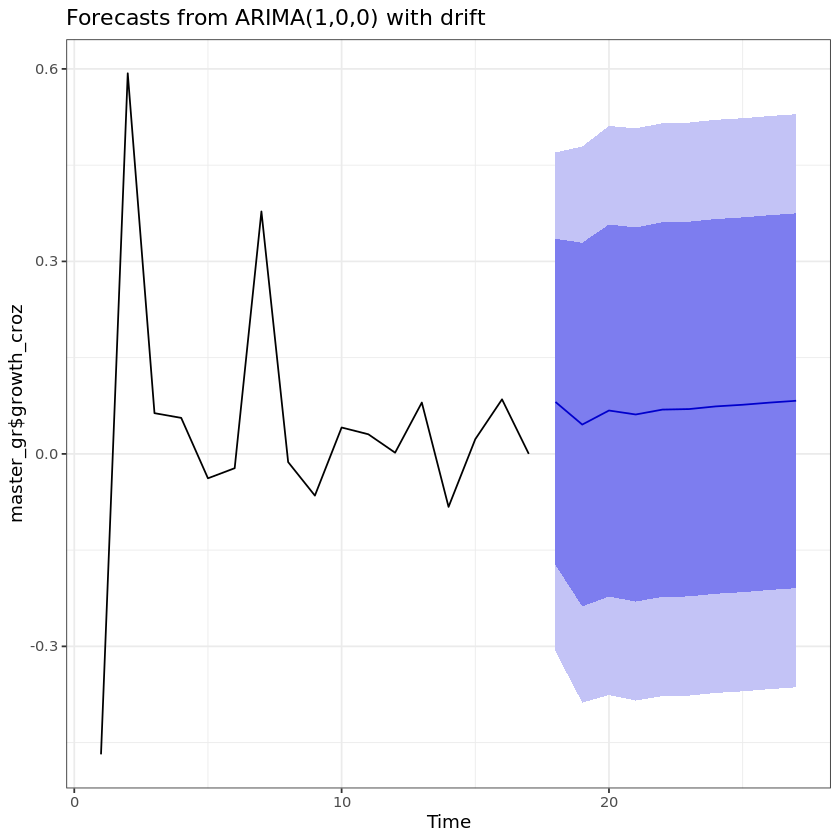

In [811]:
autoplot(forecast(mdl1))


# Plotting the correct trend

In [812]:
adcroz<-master_gr$growth_croz
names(adcroz)<-master_gr$year

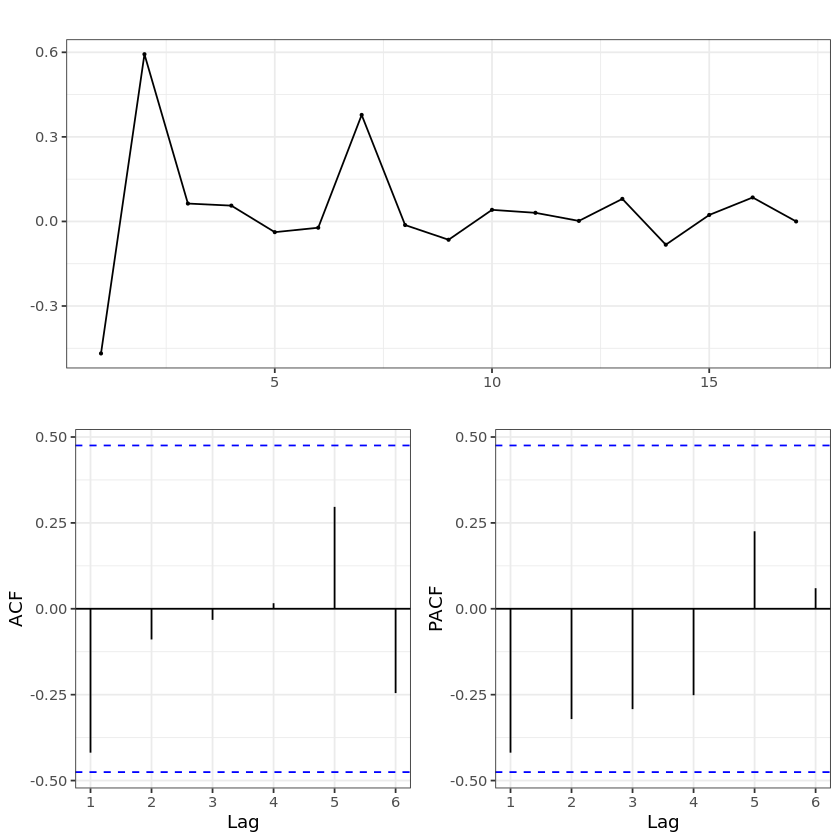

In [813]:
# Uncorrected trend
ggtsdisplay(adcroz)

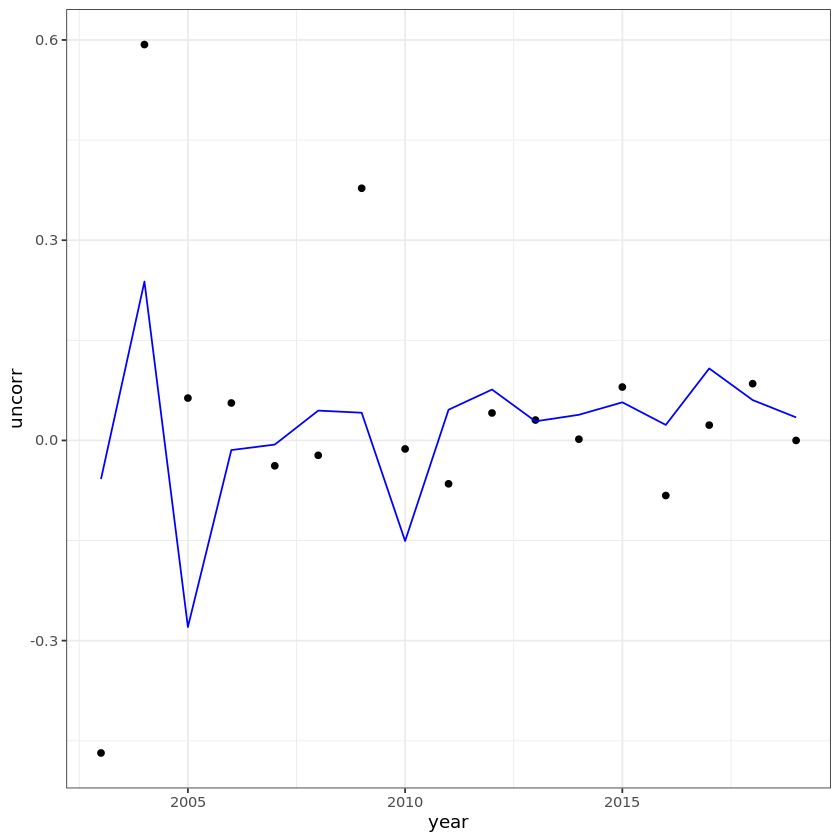

In [814]:
pdf<-data.frame(year=master_gr$year,uncorr=mdl1$x,corr=fitted(mdl1))
ggplot(pdf,aes(x=year,y=uncorr)) + geom_point() + geom_line(aes(y=corr),color="blue")

In [815]:
save(adcroz,pdf,file="/home/ubuntu/Workspace/Anthropocene/data/bestModeldata.RData")

# Playing around with the covariates

## Removing drift term and including (1,0,0) structure

## 1st: VIF to select the environmental variables to include in the saturated model

In [816]:
#threshold at 10 (it’s equivalent to explaining 99% of the information in a variable by the set of the other covariates).

#select covariates based on variance inflation

vif_func<-function(in_frame,thresh=10,trace=T,...){
  
  
  
  if(class(in_frame) != 'data.frame') in_frame<-data.frame(in_frame)
  
  
  
  #get initial vif value for all comparisons of variables
  
  vif_init<-NULL
  
  var_names <- names(in_frame)
  
  for(val in var_names){
    
    regressors <- var_names[-which(var_names == val)]
    
    form <- paste(regressors, collapse = '+')
    
    form_in <- formula(paste(val, '~', form))
    
    vif_init<-rbind(vif_init, c(val, VIF(lm(form_in, data = in_frame, ...))))
    
  }
  
  vif_max<-max(as.numeric(vif_init[,2]), na.rm = TRUE)
  
  
  
  if(vif_max < thresh){
    
    if(trace==T){ #print output of each iteration
      
      prmatrix(vif_init,collab=c('var','vif'),rowlab=rep('',nrow(vif_init)),quote=F)
      
      cat('\n')
      
      cat(paste('All variables have VIF < ', thresh,', max VIF ',round(vif_max,2), sep=''),'\n\n')
      
    }
    
    return(var_names)
    
  }
  
  else{
    
    
    
    in_dat<-in_frame
    
    
    
    #backwards selection of explanatory variables, stops when all VIF values are below 'thresh'
    
    while(vif_max >= thresh){
      
      
      
      vif_vals<-NULL
      
      var_names <- names(in_dat)
      
      
      
      for(val in var_names){
        
        regressors <- var_names[-which(var_names == val)]
        
        form <- paste(regressors, collapse = '+')
        
        form_in <- formula(paste(val, '~', form))
        
        vif_add<-VIF(lm(form_in, data = in_dat, ...))
        
        vif_vals<-rbind(vif_vals,c(val,vif_add))
        
      }
      
      max_row<-which(vif_vals[,2] == max(as.numeric(vif_vals[,2]), na.rm = TRUE))[1]
      
      
      
      vif_max<-as.numeric(vif_vals[max_row,2])
      
      
      
      if(vif_max<thresh) break
      
      
      
      if(trace==T){ #print output of each iteration
        
        prmatrix(vif_vals,collab=c('var','vif'),rowlab=rep('',nrow(vif_vals)),quote=F)
        
        cat('\n')
        
        cat('removed: ',vif_vals[max_row,1],vif_max,'\n\n')
        
        flush.console()
        
      }
      
      
      
      in_dat<-in_dat[,!names(in_dat) %in% vif_vals[max_row,1]]
      
      
      
    }
    
    
    
    return(names(in_dat))
    
    
    
  }
  
  
  
}
  
vif_func(in_frame,thresh=10,trace=T)

 var           vif
 intP_RSP      Inf
 mnChl_aw_RSP  Inf
 nmSST_aw_RSP  Inf
 intP_MCM      Inf
 mnChl_aw_MCM  Inf
 mnOW_MCM      Inf
 nmSST_aw_MCM  Inf
 mnAirTemp     Inf
 mnWind        Inf
 mnSIE         Inf
 OW_day_RSP    Inf
 logOW_day_MCM Inf
 GyreSPD       Inf
 Salinity      Inf
 mnOW_RSP6     Inf
 SIE_lag5      Inf

removed:  intP_RSP Inf 

 var           vif
 mnChl_aw_RSP  Inf
 nmSST_aw_RSP  Inf
 intP_MCM      Inf
 mnChl_aw_MCM  Inf
 mnOW_MCM      Inf
 nmSST_aw_MCM  Inf
 mnAirTemp     Inf
 mnWind        Inf
 mnSIE         Inf
 OW_day_RSP    Inf
 logOW_day_MCM Inf
 GyreSPD       Inf
 Salinity      Inf
 mnOW_RSP6     Inf
 SIE_lag5      Inf

removed:  mnChl_aw_RSP Inf 

 var           vif
 nmSST_aw_RSP  Inf
 intP_MCM      Inf
 mnChl_aw_MCM  Inf
 mnOW_MCM      Inf
 nmSST_aw_MCM  Inf
 mnAirTemp     Inf
 mnWind        Inf
 mnSIE         Inf
 OW_day_RSP    Inf
 logOW_day_MCM Inf
 GyreSPD       Inf
 Salinity      Inf
 mnOW_RSP6     Inf
 SIE_lag5      Inf

removed:  nmSST_aw_RSP Inf 

 v

[1] "nmSST_aw_MCM"  "mnAirTemp"     "mnWind"        "mnSIE"        
[5] "OW_day_RSP"    "logOW_day_MCM" "GyreSPD"       "Salinity"     
[9] "mnOW_RSP6"

# Chl, and Productivity showed up as redundant variables, so I don't include them in the saturated model, specially because how difficult is to give a rationale to link productivity with anything at the Ross Sea
 

In [817]:
#correlation test
test <- cor.test(master_gr$nmSST_aw_RSP, master_gr$mnOW_RSP6, method= "spearman")
test

test <- cor.test(master_gr$SIE_lag4, master_gr$mnOW_RSP6_lag4, method= "spearman")
test



	Spearman's rank correlation rho

data:  master_gr$nmSST_aw_RSP and master_gr$mnOW_RSP6
S = 240, p-value = 0.008217
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6470588 



	Spearman's rank correlation rho

data:  master_gr$SIE_lag4 and master_gr$mnOW_RSP6_lag4
S = 580, p-value = 0.2593
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2892157 


In [818]:
#correlation test
test <- cor.test(master_gr$nmSST_aw_RSP, master_gr$OW_day_RSP, method= "spearman")
test

Warning message in cor.test.default(master_gr$nmSST_aw_RSP, master_gr$OW_day_RSP, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  master_gr$nmSST_aw_RSP and master_gr$OW_day_RSP
S = 962.5, p-value = 0.1095
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4154467 


# Saturated model

In [819]:
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", 
                              "mnWind",   "Fish_cum3",
                                       "mnAirTemp", "nmSST_aw_RSP", "OW_day_RSP" )]) #, "mnOW_RSP6"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  av_SIE  GyreSPD   mnWind  Fish_cum3  mnAirTemp  nmSST_aw_RSP
      -0.7449  0.0806   0.0507  -0.0283     0.0053    -0.0072        0.5048
s.e.   0.1960  0.1719   0.0523   0.0808     0.0060     0.0590        0.2641
      OW_day_RSP
         -0.0032
s.e.      0.0100

sigma^2 estimated as 0.04079:  log likelihood=8.02
AIC=1.96   AICc=37.96   BIC=8.33

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.01110291 0.1379761 0.1218532 -39.61625 244.9121 0.6111818
                   ACF1
Training set -0.2277898


In [820]:
coeftest(mdlsat)


z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.7449009  0.1959740 -3.8010 0.0001441 ***
av_SIE        0.0805683  0.1719023  0.4687 0.6392936    
GyreSPD       0.0507324  0.0522804  0.9704 0.3318519    
mnWind       -0.0283142  0.0808474 -0.3502 0.7261753    
Fish_cum3     0.0053087  0.0059931  0.8858 0.3757242    
mnAirTemp    -0.0071563  0.0589850 -0.1213 0.9034341    
nmSST_aw_RSP  0.5047634  0.2641278  1.9111 0.0559972 .  
OW_day_RSP   -0.0032190  0.0099754 -0.3227 0.7469300    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [821]:
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", 
                              "mnWind",   "Fish_cum3",
                                       "mnAirTemp", "nmSST_aw_RSP")]) #, "mnOW_RSP6", "OW_day_RSP" 
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  av_SIE  GyreSPD   mnWind  Fish_cum3  mnAirTemp  nmSST_aw_RSP
      -0.7597  0.0710   0.0616  -0.0320     0.0066     0.0004        0.5392
s.e.   0.1799  0.1685   0.0398   0.0795     0.0044     0.0540        0.2416

sigma^2 estimated as 0.03582:  log likelihood=7.97
AIC=0.06   AICc=24.06   BIC=5.73

Training set error measures:
                     ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.0108102 0.1382236 0.1221392 -101.4121 307.2488 0.6126164
                  ACF1
Training set -0.262729


In [822]:
coeftest(mdlsat)


z test of coefficients:

                Estimate  Std. Error z value  Pr(>|z|)    
ar1          -0.75971594  0.17987820 -4.2235 2.405e-05 ***
av_SIE        0.07097624  0.16845555  0.4213   0.67351    
GyreSPD       0.06155820  0.03984975  1.5448   0.12240    
mnWind       -0.03200325  0.07950250 -0.4025   0.68728    
Fish_cum3     0.00661200  0.00444063  1.4890   0.13649    
mnAirTemp     0.00036925  0.05399005  0.0068   0.99454    
nmSST_aw_RSP  0.53922435  0.24164262  2.2315   0.02565 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Including lags

In [823]:
#"SIE_lag5"
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE","SIE_lag5", "GyreSPD", 
                              "mnWind",  "nmSST_aw_RSP",  "Fish_cum3",
                                       "mnAirTemp")]) # "mnOW_RSP6"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  av_SIE  SIE_lag5  GyreSPD  mnWind  nmSST_aw_RSP  Fish_cum3
      -0.8078  0.1861   -0.2857   0.0284  0.0851        0.7405     0.0076
s.e.   0.1517  0.1587    0.1541   0.0392  0.0950        0.2412     0.0040
      mnAirTemp
         0.0364
s.e.     0.0514

sigma^2 estimated as 0.03304:  log likelihood=9.48
AIC=-0.96   AICc=35.04   BIC=5.41

Training set error measures:
                       ME      RMSE       MAE      MPE    MAPE      MASE
Training set -0.008728568 0.1241643 0.1012963 30.68707 218.304 0.5080739
                   ACF1
Training set -0.4468092


In [824]:
coeftest(mdlsat)


z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
ar1          -0.8078190  0.1517281 -5.3241 1.014e-07 ***
av_SIE        0.1861435  0.1587155  1.1728   0.24087    
SIE_lag5     -0.2856861  0.1541492 -1.8533   0.06384 .  
GyreSPD       0.0283661  0.0391863  0.7239   0.46914    
mnWind        0.0850770  0.0950431  0.8951   0.37071    
nmSST_aw_RSP  0.7404656  0.2411884  3.0701   0.00214 ** 
Fish_cum3     0.0076273  0.0039632  1.9246   0.05429 .  
mnAirTemp     0.0364419  0.0514200  0.7087   0.47850    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [825]:
#SIE_lag4",
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "SIE_lag4", "GyreSPD", 
                              "mnWind",  "nmSST_aw_RSP",  "Fish_cum3",
                                       "mnAirTemp")]) #, "mnOW_RSP6"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  av_SIE  SIE_lag4  GyreSPD  mnWind  nmSST_aw_RSP  Fish_cum3
      -0.8156  0.1408   -0.2158   0.0673  0.0357        0.6637     0.0088
s.e.   0.1459  0.1447    0.0976   0.0330  0.0746        0.2136     0.0039
      mnAirTemp
         0.0320
s.e.     0.0479

sigma^2 estimated as 0.0306:  log likelihood=10.04
AIC=-2.07   AICc=33.93   BIC=4.3

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.00766083 0.1194971 0.1002572 78.86195 190.4203 0.5028623
                   ACF1
Training set -0.5108577


In [826]:
coeftest(mdlsat)


z test of coefficients:

               Estimate Std. Error z value Pr(>|z|)    
ar1          -0.8156260  0.1459457 -5.5886 2.29e-08 ***
av_SIE        0.1407676  0.1447405  0.9726 0.330776    
SIE_lag4     -0.2158406  0.0975760 -2.2120 0.026965 *  
GyreSPD       0.0672860  0.0330499  2.0359 0.041761 *  
mnWind        0.0356924  0.0746079  0.4784 0.632365    
nmSST_aw_RSP  0.6636579  0.2135953  3.1071 0.001889 ** 
Fish_cum3     0.0088120  0.0039248  2.2452 0.024754 *  
mnAirTemp     0.0319797  0.0478556  0.6683 0.503971    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [827]:
#SIE_lag4", "nmSST_aw_RSP_lag5" and "nmSST_aw_RSP_lag4",,
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "SIE_lag4", "GyreSPD", 
                              "mnWind",  "nmSST_aw_RSP", "nmSST_aw_RSP_lag4", "Fish_cum3",
                                       "mnAirTemp")]) #, "mnOW_RSP6"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  av_SIE  SIE_lag4  GyreSPD  mnWind  nmSST_aw_RSP
      -0.8081  0.1108   -0.1949   0.0573  0.0570        0.6555
s.e.   0.1492  0.1517    0.1031   0.0370  0.0822        0.2120
      nmSST_aw_RSP_lag4  Fish_cum3  mnAirTemp
                 0.0995     0.0090     0.0362
s.e.             0.1678     0.0039     0.0480

sigma^2 estimated as 0.03496:  log likelihood=10.21
AIC=-0.42   AICc=54.58   BIC=6.66

Training set error measures:
                       ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.007221312 0.1182512 0.1000737 14.58842 248.1858 0.5019418
                   ACF1
Training set -0.4571292


In [828]:
coeftest(mdlsat)


z test of coefficients:

                    Estimate Std. Error z value  Pr(>|z|)    
ar1               -0.8081044  0.1492172 -5.4156 6.107e-08 ***
av_SIE             0.1107936  0.1516862  0.7304  0.465137    
SIE_lag4          -0.1948543  0.1030902 -1.8901  0.058740 .  
GyreSPD            0.0573341  0.0369822  1.5503  0.121065    
mnWind             0.0569624  0.0822062  0.6929  0.488359    
nmSST_aw_RSP       0.6555387  0.2120364  3.0916  0.001991 ** 
nmSST_aw_RSP_lag4  0.0994975  0.1677709  0.5931  0.553144    
Fish_cum3          0.0089613  0.0038906  2.3033  0.021263 *  
mnAirTemp          0.0362172  0.0480176  0.7542  0.450700    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [829]:
#"mnAirTemp_lag5" and "mnAirTemp_lag4"
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "SIE_lag4", "GyreSPD", 
                              "mnWind",  "nmSST_aw_RSP", "Fish_cum3",
                                       "mnAirTemp", "mnAirTemp_lag5")]) #, "mnOW_RSP6"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  av_SIE  SIE_lag4  GyreSPD  mnWind  nmSST_aw_RSP  Fish_cum3
      -0.7865  0.0698   -0.3388   0.0594  0.0433        0.6293     0.0083
s.e.   0.1673  0.1390    0.1075   0.0303  0.0679        0.1904     0.0035
      mnAirTemp  mnAirTemp_lag5
        -0.0002         -0.0678
s.e.     0.0460          0.0345

sigma^2 estimated as 0.0283:  log likelihood=11.84
AIC=-3.69   AICc=51.31   BIC=3.4

Training set error measures:
                       ME      RMSE        MAE      MPE     MAPE      MASE
Training set -0.006265101 0.1063968 0.07685182 224.6399 262.5587 0.3854673
                  ACF1
Training set -0.492519


In [830]:
coeftest(mdlsat)


z test of coefficients:

                  Estimate  Std. Error z value  Pr(>|z|)    
ar1            -0.78652752  0.16726204 -4.7024 2.572e-06 ***
av_SIE          0.06979434  0.13903220  0.5020 0.6156666    
SIE_lag4       -0.33877938  0.10747515 -3.1522 0.0016206 ** 
GyreSPD         0.05937612  0.03030754  1.9591 0.0500987 .  
mnWind          0.04330651  0.06792510  0.6376 0.5237583    
nmSST_aw_RSP    0.62925146  0.19041614  3.3046 0.0009511 ***
Fish_cum3       0.00831691  0.00352902  2.3567 0.0184372 *  
mnAirTemp      -0.00019232  0.04596011 -0.0042 0.9966613    
mnAirTemp_lag5 -0.06776420  0.03446552 -1.9661 0.0492819 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [831]:
#"mnOW_RSP6_lag5" and "mnOW_RSP6_lag4" 
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "SIE_lag4", "GyreSPD", 
                              "mnWind",  "nmSST_aw_RSP", "Fish_cum3", "mnAirTemp",
                                       "mnAirTemp_lag5")]) #, "mnOW_RSP6_lag5", , "mnOW_RSP6"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  av_SIE  SIE_lag4  GyreSPD  mnWind  nmSST_aw_RSP  Fish_cum3
      -0.7865  0.0698   -0.3388   0.0594  0.0433        0.6293     0.0083
s.e.   0.1673  0.1390    0.1075   0.0303  0.0679        0.1904     0.0035
      mnAirTemp  mnAirTemp_lag5
        -0.0002         -0.0678
s.e.     0.0460          0.0345

sigma^2 estimated as 0.0283:  log likelihood=11.84
AIC=-3.69   AICc=51.31   BIC=3.4

Training set error measures:
                       ME      RMSE        MAE      MPE     MAPE      MASE
Training set -0.006265101 0.1063968 0.07685182 224.6399 262.5587 0.3854673
                  ACF1
Training set -0.492519


In [832]:
coeftest(mdlsat)
                    


z test of coefficients:

                  Estimate  Std. Error z value  Pr(>|z|)    
ar1            -0.78652752  0.16726204 -4.7024 2.572e-06 ***
av_SIE          0.06979434  0.13903220  0.5020 0.6156666    
SIE_lag4       -0.33877938  0.10747515 -3.1522 0.0016206 ** 
GyreSPD         0.05937612  0.03030754  1.9591 0.0500987 .  
mnWind          0.04330651  0.06792510  0.6376 0.5237583    
nmSST_aw_RSP    0.62925146  0.19041614  3.3046 0.0009511 ***
Fish_cum3       0.00831691  0.00352902  2.3567 0.0184372 *  
mnAirTemp      -0.00019232  0.04596011 -0.0042 0.9966613    
mnAirTemp_lag5 -0.06776420  0.03446552 -1.9661 0.0492819 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [833]:
# removing SIE(NO LAG) AND AIR TEMP (NO LAG) and Wind
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "GyreSPD", 
                               "nmSST_aw_RSP", "Fish_cum3", "mnAirTemp_lag5"
                                       )]) 
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  GyreSPD  nmSST_aw_RSP  Fish_cum3  mnAirTemp_lag5
      -0.7842   -0.2299   0.0857        0.4580     0.0087         -0.0580
s.e.   0.1622    0.0885   0.0252        0.1576     0.0031          0.0322

sigma^2 estimated as 0.02234:  log likelihood=10.58
AIC=-7.16   AICc=8.84   BIC=-2.2

Training set error measures:
                       ME      RMSE        MAE      MPE     MAPE      MASE
Training set -0.007049711 0.1157736 0.08689384 377.6063 463.1512 0.4358354
                   ACF1
Training set -0.2953875


In [834]:
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.7841838  0.1622398 -4.8335 1.342e-06 ***
SIE_lag4       -0.2298976  0.0884527 -2.5991 0.0093468 ** 
GyreSPD         0.0856882  0.0251598  3.4058 0.0006598 ***
nmSST_aw_RSP    0.4580423  0.1576125  2.9061 0.0036593 ** 
Fish_cum3       0.0087279  0.0031033  2.8125 0.0049159 ** 
mnAirTemp_lag5 -0.0580208  0.0322422 -1.7995 0.0719347 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [835]:
#INCLUDING GYRE LAG
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "GyreSPD_lag4",
                                "nmSST_aw_RSP", "Fish_cum3",
                                       "mnAirTemp_lag5")]) 
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  GyreSPD_lag4  nmSST_aw_RSP  Fish_cum3  mnAirTemp_lag5
      -0.5747   -0.1756        0.0751        0.5037     0.0020         -0.0836
s.e.   0.2319    0.0996        0.0341        0.1885     0.0035          0.0379

sigma^2 estimated as 0.0262:  log likelihood=9.99
AIC=-5.99   AICc=8.01   BIC=-0.58

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.004985718 0.1279554 0.1123943 -433.6485 663.0062 0.5637385
                  ACF1
Training set 0.0544969


In [836]:
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value Pr(>|z|)   
ar1            -0.5746575  0.2318689 -2.4784 0.013198 * 
SIE_lag4       -0.1756291  0.0995825 -1.7637 0.077790 . 
GyreSPD_lag4    0.0751228  0.0340684  2.2051 0.027450 * 
nmSST_aw_RSP    0.5037037  0.1884720  2.6726 0.007527 **
Fish_cum3       0.0020478  0.0034553  0.5927 0.553415   
mnAirTemp_lag5 -0.0835689  0.0379229 -2.2037 0.027549 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [837]:

cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "GyreSPD",
                                "nmSST_aw_RSP", "Fish_cum3",
                                       "mnAirTemp_lag5")]) 
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  GyreSPD  nmSST_aw_RSP  Fish_cum3  mnAirTemp_lag5
      -0.7842   -0.2299   0.0857        0.4580     0.0087         -0.0580
s.e.   0.1622    0.0885   0.0252        0.1576     0.0031          0.0322

sigma^2 estimated as 0.02234:  log likelihood=10.58
AIC=-7.16   AICc=8.84   BIC=-2.2

Training set error measures:
                       ME      RMSE        MAE      MPE     MAPE      MASE
Training set -0.007049711 0.1157736 0.08689384 377.6063 463.1512 0.4358354
                   ACF1
Training set -0.2953875


In [838]:
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.7841838  0.1622398 -4.8335 1.342e-06 ***
SIE_lag4       -0.2298976  0.0884527 -2.5991 0.0093468 ** 
GyreSPD         0.0856882  0.0251598  3.4058 0.0006598 ***
nmSST_aw_RSP    0.4580423  0.1576125  2.9061 0.0036593 ** 
Fish_cum3       0.0087279  0.0031033  2.8125 0.0049159 ** 
mnAirTemp_lag5 -0.0580208  0.0322422 -1.7995 0.0719347 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [839]:
#checking OW_day_RSP
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "GyreSPD",
                                "nmSST_aw_RSP", "Fish_cum3",
                                       "mnAirTemp_lag5", "OW_day_RSP")]) 
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)


Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  GyreSPD  nmSST_aw_RSP  Fish_cum3  mnAirTemp_lag5
      -0.7929   -0.2492   0.0901        0.5243     0.0097         -0.0638
s.e.   0.1535    0.0939   0.0260        0.1966     0.0036          0.0334
      OW_day_RSP
          0.0032
s.e.      0.0059

sigma^2 estimated as 0.02457:  log likelihood=10.73
AIC=-5.46   AICc=18.54   BIC=0.2

Training set error measures:
                       ME      RMSE        MAE      MPE     MAPE      MASE
Training set -0.006650581 0.1144804 0.08060308 285.9228 361.0075 0.4042826
                   ACF1
Training set -0.3820798


In [840]:
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.7929125  0.1535155 -5.1650 2.404e-07 ***
SIE_lag4       -0.2491519  0.0938839 -2.6538 0.0079584 ** 
GyreSPD         0.0901311  0.0259864  3.4684 0.0005236 ***
nmSST_aw_RSP    0.5243262  0.1966135  2.6668 0.0076580 ** 
Fish_cum3       0.0097407  0.0035677  2.7303 0.0063281 ** 
mnAirTemp_lag5 -0.0637516  0.0333547 -1.9113 0.0559630 .  
OW_day_RSP      0.0032383  0.0058644  0.5522 0.5808158    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [841]:

#checking OW_RSP, does not improve the model
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "GyreSPD",
                                 "Fish_cum3", "mnOW_RSP6",
                                       "mnAirTemp_lag5")]) 
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  GyreSPD  Fish_cum3  mnOW_RSP6  mnAirTemp_lag5
      -0.4611   -0.4725   0.0089     0.0033     3.4189         -0.0918
s.e.   0.3403    0.1397   0.0497     0.0036     1.9621          0.0458

sigma^2 estimated as 0.03121:  log likelihood=8.43
AIC=-2.86   AICc=13.14   BIC=2.09

Training set error measures:
                       ME     RMSE       MAE      MPE     MAPE      MASE
Training set -0.007370189 0.136832 0.1069028 702.1033 722.1261 0.5361945
                    ACF1
Training set -0.05672473


In [842]:
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.4610661  0.3402641 -1.3550 0.1754098    
SIE_lag4       -0.4724744  0.1397365 -3.3812 0.0007217 ***
GyreSPD         0.0088587  0.0497491  0.1781 0.8586705    
Fish_cum3       0.0032698  0.0036477  0.8964 0.3700470    
mnOW_RSP6       3.4189324  1.9621379  1.7425 0.0814293 .  
mnAirTemp_lag5 -0.0918066  0.0458180 -2.0037 0.0450995 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [843]:
#best model
#quadratics
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4_2", "SIE_lag4", "GyreSPD",
                                "nmSST_aw_RSP", "Fish_cum3",
                                       "mnAirTemp_lag5")]) 
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4_2  SIE_lag4  GyreSPD  nmSST_aw_RSP  Fish_cum3
      -0.7776     -0.0884    0.1231   0.0566        0.5884     0.0085
s.e.   0.1646      0.0840    0.3463   0.0370        0.1967     0.0030
      mnAirTemp_lag5
             -0.0626
s.e.          0.0313

sigma^2 estimated as 0.02343:  log likelihood=11.12
AIC=-6.24   AICc=17.76   BIC=-0.58

Training set error measures:
                       ME      RMSE        MAE      MPE     MAPE      MASE
Training set -0.007134829 0.1117816 0.08054378 375.8754 420.6141 0.4039852
                  ACF1
Training set -0.357546


In [844]:
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.7775507  0.1645595 -4.7250 2.301e-06 ***
SIE_lag4_2     -0.0883681  0.0839580 -1.0525  0.292558    
SIE_lag4        0.1230806  0.3462527  0.3555  0.722242    
GyreSPD         0.0566456  0.0369982  1.5310  0.125760    
nmSST_aw_RSP    0.5883812  0.1966833  2.9915  0.002776 ** 
Fish_cum3       0.0084583  0.0030126  2.8076  0.004991 ** 
mnAirTemp_lag5 -0.0626058  0.0313387 -1.9977  0.045747 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [845]:
#best model
#quadratics
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "GyreSPD", "GyreSPD_2",
                                "nmSST_aw_RSP", "Fish_cum3",
                                       "mnAirTemp_lag5")]) 
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  GyreSPD  GyreSPD_2  nmSST_aw_RSP  Fish_cum3
      -0.7771   -0.5409   0.4818    -0.0350        0.7379     0.0100
s.e.   0.1636    0.1990   0.2328     0.0205        0.2186     0.0029
      mnAirTemp_lag5
             -0.0642
s.e.          0.0294

sigma^2 estimated as 0.02103:  log likelihood=11.93
AIC=-7.86   AICc=16.14   BIC=-2.2

Training set error measures:
                       ME      RMSE        MAE     MPE     MAPE      MASE
Training set -0.006571571 0.1059098 0.08192564 408.887 449.8062 0.4109162
                   ACF1
Training set -0.3626302


In [846]:
coeftest(mdlsat)


z test of coefficients:

                Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.777137   0.163601 -4.7502 2.032e-06 ***
SIE_lag4       -0.540903   0.199030 -2.7177 0.0065739 ** 
GyreSPD         0.481809   0.232756  2.0700 0.0384508 *  
GyreSPD_2      -0.034977   0.020510 -1.7054 0.0881220 .  
nmSST_aw_RSP    0.737950   0.218617  3.3755 0.0007367 ***
Fish_cum3       0.010025   0.002940  3.4098 0.0006500 ***
mnAirTemp_lag5 -0.064236   0.029425 -2.1830 0.0290355 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [847]:
#INTERCEPT ONLY
cov_sat_growth<-as.matrix(master_gr[,c(1)]) 
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:


Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


          ar1  xreg
      -0.6109     0
s.e.      NaN   NaN

sigma^2 estimated as 0.03477:  log likelihood=5.26
AIC=-4.52   AICc=-2.67   BIC=-2.02

Training set error measures:
                      ME      RMSE      MAE  MPE MAPE     MASE      ACF1
Training set -0.01219961 0.1751582 0.131037 -Inf  Inf 0.657245 0.0196731


# We explored all the cuadratics only Gyre_2 improved the best model

In [848]:
#explore different percentages weights for cum_fish
#Fish= Total Tonnes * Perc.134/100
#Fish_cum3; 3 years cumulative, no weights
#Fish_cum_8_9_1; 3 years cumulative, weights: 80%, 90% ,100%
#Fish_cum_6_8_1; 3 years cumulative, weights: 60%, 80% ,100%
#Fish_cum_75_1; 2 years cumulative, weights: 75%, 100%
#Fish_cum; 2 years cumulative, no weights
#Fish_cum_5_1; 2 years cumulative, weights: 50%, 100%
#Fish_cum_4_1; 2 years cumulative, weights: 40%, 100%
#Fish_cum_2_1; 2 years cumulative, weights: 20%, 100%

In [849]:
## Explored various Fish_cum moving window configurations, best ones are Fich_cum3 and Fish_cum_8_9_1.
# That is: 0.75 prop134 at t-1 + prop134 at t
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "GyreSPD", "GyreSPD_2",
                                "nmSST_aw_RSP", "Fish_cum3", "mnAirTemp_lag5"
                                       )]) 
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  GyreSPD  GyreSPD_2  nmSST_aw_RSP  Fish_cum3
      -0.7771   -0.5409   0.4818    -0.0350        0.7379     0.0100
s.e.   0.1636    0.1990   0.2328     0.0205        0.2186     0.0029
      mnAirTemp_lag5
             -0.0642
s.e.          0.0294

sigma^2 estimated as 0.02103:  log likelihood=11.93
AIC=-7.86   AICc=16.14   BIC=-2.2

Training set error measures:
                       ME      RMSE        MAE     MPE     MAPE      MASE
Training set -0.006571571 0.1059098 0.08192564 408.887 449.8062 0.4109162
                   ACF1
Training set -0.3626302


In [850]:
coeftest(mdlsat)


z test of coefficients:

                Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.777137   0.163601 -4.7502 2.032e-06 ***
SIE_lag4       -0.540903   0.199030 -2.7177 0.0065739 ** 
GyreSPD         0.481809   0.232756  2.0700 0.0384508 *  
GyreSPD_2      -0.034977   0.020510 -1.7054 0.0881220 .  
nmSST_aw_RSP    0.737950   0.218617  3.3755 0.0007367 ***
Fish_cum3       0.010025   0.002940  3.4098 0.0006500 ***
mnAirTemp_lag5 -0.064236   0.029425 -2.1830 0.0290355 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [851]:
#including CHL and Productivity
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "GyreSPD", "GyreSPD_2",
                                "nmSST_aw_RSP", "Fish_cum3", "mnAirTemp_lag5", "intP_RSP" 
                                       )]) #intP_RSP	mnChl_aw_RSP
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  GyreSPD  GyreSPD_2  nmSST_aw_RSP  Fish_cum3
      -0.7629   -0.6407   0.6044    -0.0444        0.7943     0.0112
s.e.   0.1644    0.2699   0.3233     0.0268        0.2397     0.0036
      mnAirTemp_lag5  intP_RSP
             -0.0719   -0.2092
s.e.          0.0326    0.3869

sigma^2 estimated as 0.02366:  log likelihood=12.08
AIC=-6.15   AICc=29.85   BIC=0.22

Training set error measures:
                       ME      RMSE        MAE      MPE     MAPE      MASE
Training set -0.005693026 0.1050755 0.07865623 351.8885 395.9267 0.3945178
                   ACF1
Training set -0.4166686


In [852]:
#including CHL and Productivity
cov_sat_growth<-as.matrix(master_gr[,c("SIE_lag4", "GyreSPD", "GyreSPD_2",
                                "nmSST_aw_RSP", "Fish_cum3", "mnAirTemp_lag5", "mnChl_aw_RSP" 
                                       )]) #intP_RSP	mnChl_aw_RSP
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  SIE_lag4  GyreSPD  GyreSPD_2  nmSST_aw_RSP  Fish_cum3
      -0.7845   -0.4587   0.3852    -0.0277        0.7093     0.0090
s.e.   0.1661    0.2724   0.3193     0.0263        0.2268     0.0037
      mnAirTemp_lag5  mnChl_aw_RSP
             -0.0639        0.0670
s.e.          0.0291        0.1539

sigma^2 estimated as 0.02369:  log likelihood=12.02
AIC=-6.05   AICc=29.95   BIC=0.32

Training set error measures:
                       ME      RMSE        MAE      MPE     MAPE      MASE
Training set -0.006862537 0.1051424 0.08239934 440.3486 477.6421 0.4132922
                   ACF1
Training set -0.3181834


In [853]:
#correlation test
test <- cor.test(master_gr$nmSST_aw_RSP, master_gr$mnOW_RSP6, method= "spearman")
test


	Spearman's rank correlation rho

data:  master_gr$nmSST_aw_RSP and master_gr$mnOW_RSP6
S = 240, p-value = 0.008217
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6470588 



	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,0) errors
Q* = NA, df = 7, p-value = NA

Model df: 8.   Total lags used: 15



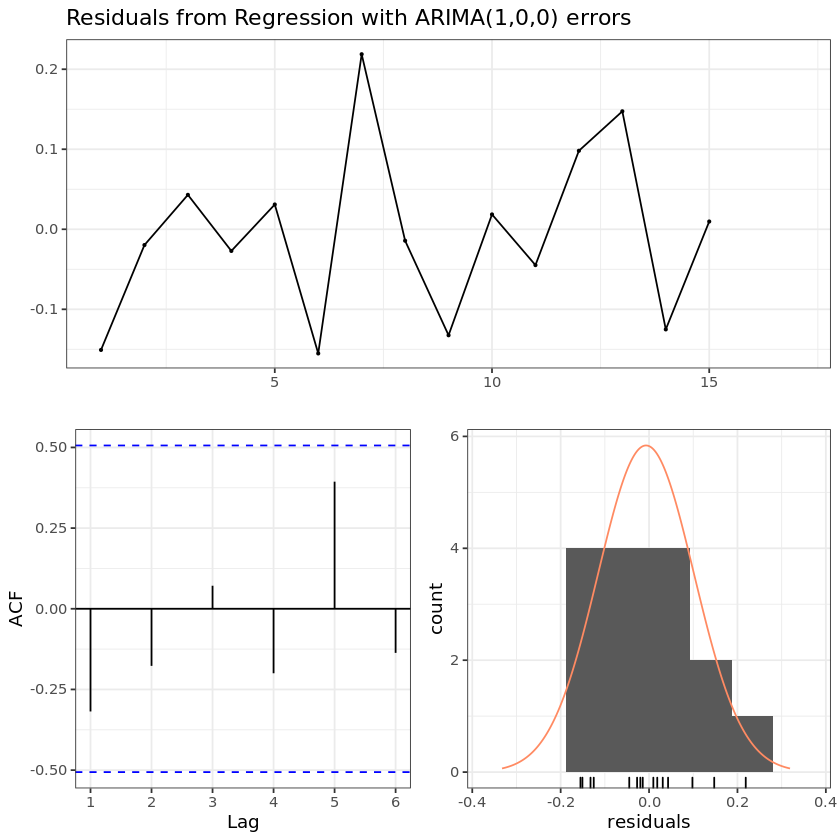

In [854]:
checkresiduals (mdlsat, lag=15)

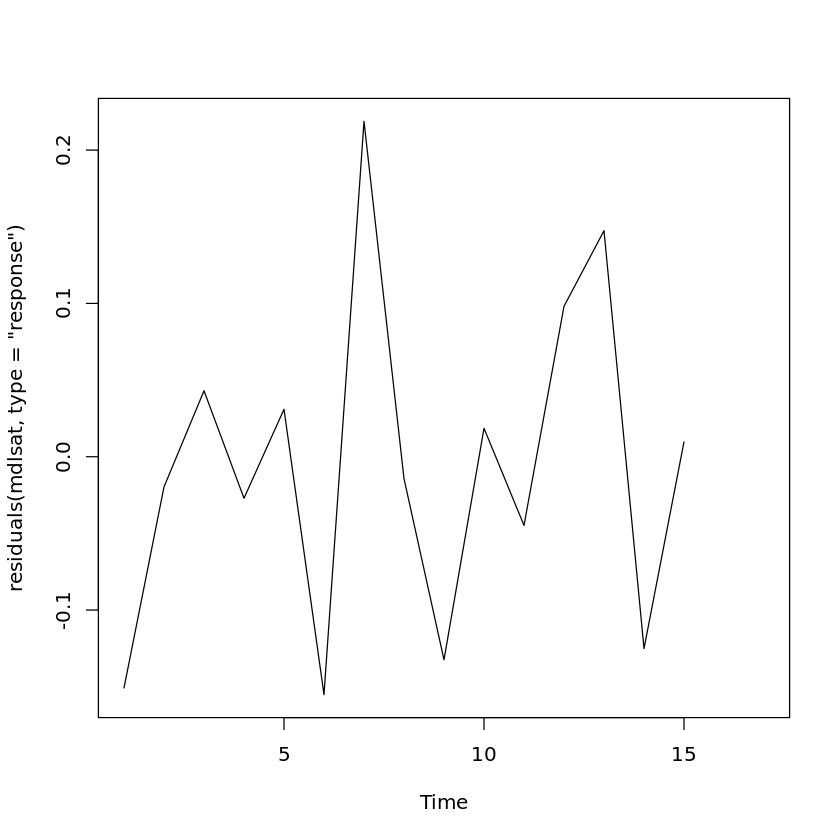

In [855]:
plot(residuals(mdlsat, type="response"))

In [856]:
save(master_gr,mdlsat,cov_sat_growth,file="/home/ubuntu/Workspace/Anthropocene/data/bestModelfit.RData")


	Ljung-Box test

data:  Residuals from Regression with ARIMA(1,0,0) errors
Q* = 16.778, df = 3, p-value = 0.0007851

Model df: 7.   Total lags used: 10



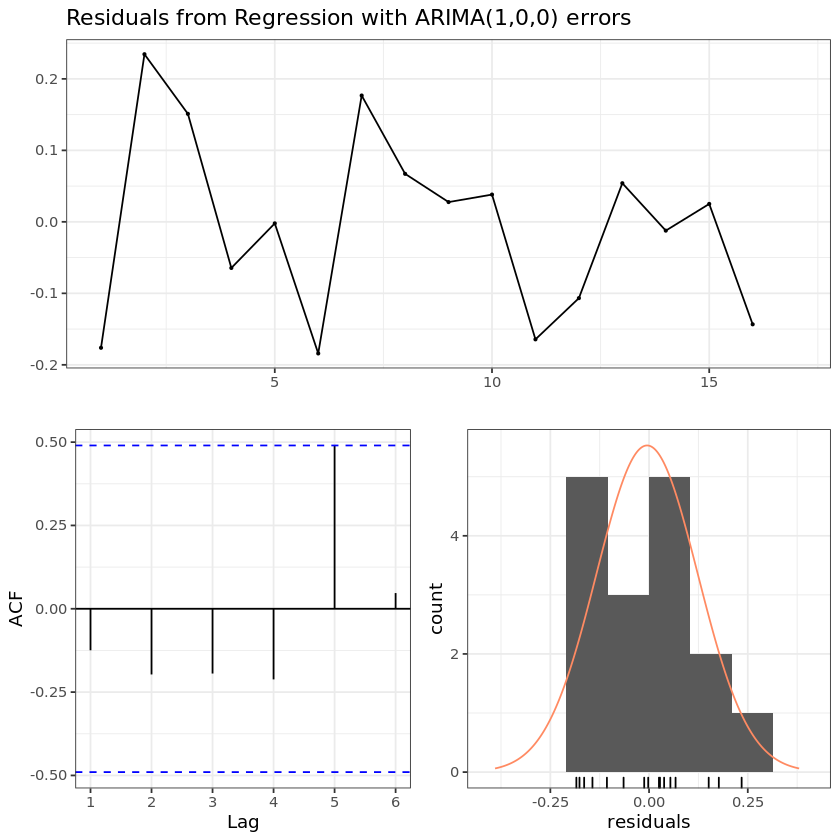

In [857]:
checkresiduals(mdlsatow)

# Checking for correlations

In [858]:
in_frame <- master_gr %>% select (av_SIE, GyreSPD, 
                              mnWind,   Fish_cum3,
                                       mnAirTemp, mnOW_RSP6)

ERROR: Error: Can't subset columns that don't exist.
[31m✖[39m Column `Cum_fish8` doesn't exist.


In [898]:
#threshold at 10 (it’s equivalent to explaining 99% of the information in a variable by the set of the other covariates).

#select covariates based on variance inflation

vif_func<-function(in_frame,thresh=10,trace=T,...){
  
  
  
  if(class(in_frame) != 'data.frame') in_frame<-data.frame(in_frame)
  
  
  
  #get initial vif value for all comparisons of variables
  
  vif_init<-NULL
  
  var_names <- names(in_frame)
  
  for(val in var_names){
    
    regressors <- var_names[-which(var_names == val)]
    
    form <- paste(regressors, collapse = '+')
    
    form_in <- formula(paste(val, '~', form))
    
    vif_init<-rbind(vif_init, c(val, VIF(lm(form_in, data = in_frame, ...))))
    
  }
  
  vif_max<-max(as.numeric(vif_init[,2]), na.rm = TRUE)
  
  
  
  if(vif_max < thresh){
    
    if(trace==T){ #print output of each iteration
      
      prmatrix(vif_init,collab=c('var','vif'),rowlab=rep('',nrow(vif_init)),quote=F)
      
      cat('\n')
      
      cat(paste('All variables have VIF < ', thresh,', max VIF ',round(vif_max,2), sep=''),'\n\n')
      
    }
    
    return(var_names)
    
  }
  
  else{
    
    
    
    in_dat<-in_frame
    
    
    
    #backwards selection of explanatory variables, stops when all VIF values are below 'thresh'
    
    while(vif_max >= thresh){
      
      
      
      vif_vals<-NULL
      
      var_names <- names(in_dat)
      
      
      
      for(val in var_names){
        
        regressors <- var_names[-which(var_names == val)]
        
        form <- paste(regressors, collapse = '+')
        
        form_in <- formula(paste(val, '~', form))
        
        vif_add<-VIF(lm(form_in, data = in_dat, ...))
        
        vif_vals<-rbind(vif_vals,c(val,vif_add))
        
      }
      
      max_row<-which(vif_vals[,2] == max(as.numeric(vif_vals[,2]), na.rm = TRUE))[1]
      
      
      
      vif_max<-as.numeric(vif_vals[max_row,2])
      
      
      
      if(vif_max<thresh) break
      
      
      
      if(trace==T){ #print output of each iteration
        
        prmatrix(vif_vals,collab=c('var','vif'),rowlab=rep('',nrow(vif_vals)),quote=F)
        
        cat('\n')
        
        cat('removed: ',vif_vals[max_row,1],vif_max,'\n\n')
        
        flush.console()
        
      }
      
      
      
      in_dat<-in_dat[,!names(in_dat) %in% vif_vals[max_row,1]]
      
      
      
    }
    
    
    
    return(names(in_dat))
    
    
    
  }
  
  
  
}
  
vif_func(in_frame,thresh=10,trace=T)

 var           vif
 intP_RSP      Inf
 mnChl_aw_RSP  Inf
 nmSST_aw_RSP  Inf
 intP_MCM      Inf
 mnChl_aw_MCM  Inf
 mnOW_MCM      Inf
 nmSST_aw_MCM  Inf
 mnAirTemp     Inf
 mnWind        Inf
 mnSIE         Inf
 OW_day_RSP    Inf
 logOW_day_MCM Inf
 GyreSPD       Inf
 Salinity      Inf
 mnOW_RSP6     Inf
 SIE_lag5      Inf

removed:  intP_RSP Inf 

 var           vif
 mnChl_aw_RSP  Inf
 nmSST_aw_RSP  Inf
 intP_MCM      Inf
 mnChl_aw_MCM  Inf
 mnOW_MCM      Inf
 nmSST_aw_MCM  Inf
 mnAirTemp     Inf
 mnWind        Inf
 mnSIE         Inf
 OW_day_RSP    Inf
 logOW_day_MCM Inf
 GyreSPD       Inf
 Salinity      Inf
 mnOW_RSP6     Inf
 SIE_lag5      Inf

removed:  mnChl_aw_RSP Inf 

 var           vif
 nmSST_aw_RSP  Inf
 intP_MCM      Inf
 mnChl_aw_MCM  Inf
 mnOW_MCM      Inf
 nmSST_aw_MCM  Inf
 mnAirTemp     Inf
 mnWind        Inf
 mnSIE         Inf
 OW_day_RSP    Inf
 logOW_day_MCM Inf
 GyreSPD       Inf
 Salinity      Inf
 mnOW_RSP6     Inf
 SIE_lag5      Inf

removed:  nmSST_aw_RSP Inf 

 v

[1] "nmSST_aw_MCM"  "mnAirTemp"     "mnWind"        "mnSIE"        
[5] "OW_day_RSP"    "logOW_day_MCM" "GyreSPD"       "Salinity"     
[9] "mnOW_RSP6"

# Partial dependence plots

In [859]:
## function to generate the data
# df is the source data.frame (master_gr)
# varv is the variable for which to construct the partial dependence plot
# meanmed indicates if fixing other variables to their mean or median value
# mdl is the model in which to evaluate the partial dependence
# type indicates if evaluating the dependence on a sequence of the predictor values or their real values
getPDdata<-function(df,varv, meanmed="mean", mdl, type="seq"){
    #get fixed values of constant vars
    cvars<-names(coef(mdl)); cvars<-cvars[which(!cvars %in% c(varv,"ar1","ar2","ar3"))]
    pddc<-sapply(cvars,function(vv,df,meanmed){
        mvv<-ifelse(meanmed=="mean",mean(df[,vv],na.rm=T),median(df[,vv],na.rm=T))
    },df=df,meanmed=meanmed)
    
    #get varying values of partial dependence var
    if(type=="seq"){
        minprv<-min(df[,varv],na.rm=T); maxprv<-max(df[,varv],na.rm=T)
        prv<-seq(minprv,maxprv,length.out=nrow(df))
    }else{
        prv<-unique(df[,varv])
    }
    pddf<-data.frame(prv=prv);names(pddf)<-varv
    
    #combine into matrix
    for(ii in 1:NROW(pddc)){
        cvn<-pddc[ii]; cvnn<-cvars[ii]
        pddf<-cbind(pddf,cvnv=rep(cvn,nrow(pddf)))
        names(pddf)<-gsub("cvnv",cvnn,names(pddf))
    }
    #must re-order as in the original matrix used to train the model
    cvars<-names(coef(mdl)); cvars<-cvars[which(!cvars %in% c("ar1","ar2","ar3"))]
    pddf<-pddf[,cvars]
    pdmx<-as.matrix(pddf)
    
    preds<-forecast(mdl,xreg=pdmx,level=95)
    plotdata<-data.frame(varv=prv,meanv=as.numeric(preds$mean),
                         lcv=as.numeric(preds$lower),ucv=as.numeric(preds$upper))
    names(plotdata)<-gsub("varv",varv,names(plotdata))
    return(plotdata)
}



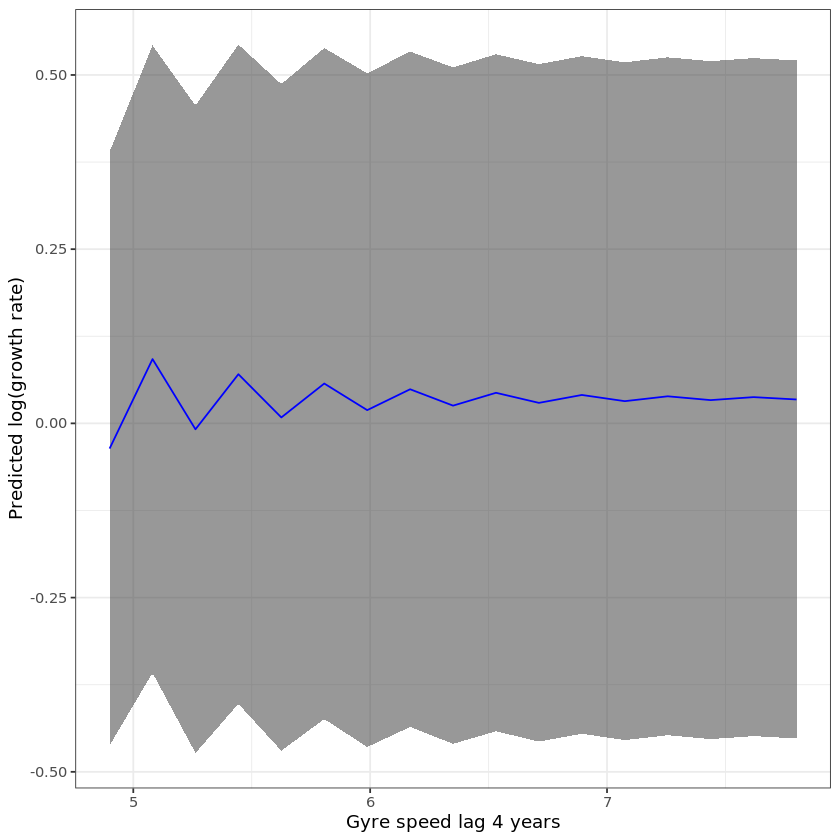

In [860]:
pdat<-getPDdata(df=master_gr,varv="GyreSPD_lag4",mdl=mdlsat)
ggplot(pdat,aes(x=GyreSPD_lag4,y=meanv)) + geom_ribbon(aes(ymin=lcv,ymax=ucv),alpha=0.5) + geom_line(color="blue") +
    labs(x="Gyre speed lag 4 years", y = "Predicted log(growth rate)")

In [773]:
pdat<-getPDdata(df=master_gr,varv="nmSST_aw_RSP",mdl=mod7)
ggplot(pdat,aes(x= nmSST_aw_RSP,y=meanv)) + geom_ribbon(aes(ymin=lcv,ymax=ucv),alpha=0.5) + geom_line(color="blue") +
    labs(x="Sea Surface Temperature (C)", y = "Predicted log(growth rate)")

ERROR: Error in coef(mdl): object 'mod7' not found


In [ ]:
#nmSST_aw_RSP
pdat<-getPDdata(df=master_gr,varv="SIE_lag4",mdl=mod7)
ggplot(pdat,aes(x= nmSST_aw_RSP,y=meanv)) + geom_ribbon(aes(ymin=lcv,ymax=ucv),alpha=0.5) + geom_line(color="blue") +
    labs(x="Sea Surface Temperature", y = "Predicted log(growth rate)", title="Arima model of order (1,0,0)")

In [ ]:
pdat<-getPDdata(df=master_gr,varv="Fish_cum_75_1",mdl=mdlsat)
ggplot(pdat,aes(x=Prop._134,y=meanv)) + geom_ribbon(aes(ymin=lcv,ymax=ucv),alpha=0.5) + geom_line(color="blue") +
    labs(x="Proportion of Toothfish > 134 cm in catch", y = "Predicted log(growth rate)", title="Arima model of order (1,0,0)")

# From here SST will be excluded due its correlation with OW and the lack of consistent hypothesis to explain its effect on penguin annual growth

## Starting the selection model from the beggining 

In [615]:
#correlation test
test <- cor.test(master_gr$mnOW_RSP6, master_gr$OW_day_RSP)
test


	Pearson's product-moment correlation

data:  master_gr$mnOW_RSP6 and master_gr$OW_day_RSP
t = -4.5926, df = 14, p-value = 0.0004183
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9181335 -0.4540710
sample estimates:
       cor 
-0.7752736 


In [889]:
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", 
                              "mnWind",   "Fish_cum3",
                                       "mnAirTemp", "mnOW_RSP6" )]) #, "OW_day_RSP"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  av_SIE  GyreSPD   mnWind  Fish_cum3  mnAirTemp  mnOW_RSP6
      -0.8505  0.1099   0.1133  -0.1146     0.0028    -0.0258    -0.8651
s.e.   0.1660  0.1932   0.0569   0.0765     0.0045     0.0574     1.6520

sigma^2 estimated as 0.04626:  log likelihood=5.84
AIC=4.32   AICc=28.32   BIC=9.99

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.01567541 0.1570744 0.1282612 200.8574 479.3735 0.6433226
                   ACF1
Training set -0.1364377


In [890]:
coeftest(mdlsat)


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1       -0.8504864  0.1659679 -5.1244 2.985e-07 ***
av_SIE     0.1098775  0.1932334  0.5686   0.56961    
GyreSPD    0.1133107  0.0568546  1.9930   0.04626 *  
mnWind    -0.1145647  0.0764976 -1.4976   0.13423    
Fish_cum3  0.0028053  0.0045026  0.6230   0.53326    
mnAirTemp -0.0258420  0.0573592 -0.4505   0.65233    
mnOW_RSP6 -0.8651326  1.6520037 -0.5237   0.60050    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [891]:
# R squared
cor(fitted(mdlsat),master_gr$growth_croz)^2

b <- lm(diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 1)
summary(b)

[1] NA


Call:
lm(formula = diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 
    1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45736 -0.22370 -0.02315  0.20927  0.59421 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)
diff(cov_sat_growth)av_SIE    -0.5819709  0.6494905  -0.896    0.396
diff(cov_sat_growth)GyreSPD    0.0101411  0.1021937   0.099    0.923
diff(cov_sat_growth)mnWind     0.0704765  0.1201350   0.587    0.574
diff(cov_sat_growth)Fish_cum3 -0.0004154  0.0213946  -0.019    0.985
diff(cov_sat_growth)mnAirTemp -0.1503511  0.1955725  -0.769    0.464
diff(cov_sat_growth)mnOW_RSP6  4.7111471  2.5945030   1.816    0.107

Residual standard error: 0.3805 on 8 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.352,	Adjusted R-squared:  -0.134 
F-statistic: 0.7242 on 6 and 8 DF,  p-value: 0.6431


In [892]:
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", 
                              "mnWind",   "Fish_cum3",
                                       "mnAirTemp", "OW_day_RSP" )]) # "mnOW_RSP6"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  av_SIE  GyreSPD   mnWind  Fish_cum3  mnAirTemp  OW_day_RSP
      -0.7555  0.1122   0.0470  -0.0812    -0.0012    -0.0483     -0.0115
s.e.   0.2282  0.1937   0.0569   0.0836     0.0055     0.0613      0.0101

sigma^2 estimated as 0.04444:  log likelihood=6.36
AIC=3.28   AICc=27.28   BIC=8.94

Training set error measures:
                      ME      RMSE       MAE      MPE    MAPE      MASE
Training set -0.01604534 0.1539457 0.1355301 298.2586 579.274 0.6797811
                    ACF1
Training set -0.04463834


In [893]:
coeftest(mdlsat)


z test of coefficients:

             Estimate Std. Error z value  Pr(>|z|)    
ar1        -0.7555258  0.2281568 -3.3114 0.0009282 ***
av_SIE      0.1122351  0.1936919  0.5795 0.5622845    
GyreSPD     0.0469895  0.0569229  0.8255 0.4090915    
mnWind     -0.0812132  0.0835553 -0.9720 0.3310661    
Fish_cum3  -0.0011656  0.0055284 -0.2108 0.8330136    
mnAirTemp  -0.0482541  0.0613013 -0.7872 0.4311870    
OW_day_RSP -0.0114577  0.0101470 -1.1292 0.2588233    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [894]:
cor(fitted(mdlsat),master_gr$growth_croz)^2

b <- lm(diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 1)
summary(b)

[1] NA


Call:
lm(formula = diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 
    1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5531 -0.1768  0.0332  0.1725  0.7760 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)
diff(cov_sat_growth)av_SIE     -0.4767111  0.7052792  -0.676    0.518
diff(cov_sat_growth)GyreSPD     0.0361228  0.1122525   0.322    0.756
diff(cov_sat_growth)mnWind      0.0418412  0.1305581   0.320    0.757
diff(cov_sat_growth)Fish_cum3  -0.0001525  0.0230941  -0.007    0.995
diff(cov_sat_growth)mnAirTemp  -0.1580209  0.2150399  -0.735    0.483
diff(cov_sat_growth)OW_day_RSP -0.0180658  0.0138708  -1.302    0.229

Residual standard error: 0.4107 on 8 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.245,	Adjusted R-squared:  -0.3213 
F-statistic: 0.4327 on 6 and 8 DF,  p-value: 0.8384


In [883]:
#checking OW_lag

cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", 
                              "mnWind",   "Fish_cum3",
                                       "mnAirTemp", "OW_day_RSPlag4" )]) # "mnOW_RSP6"
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  GyreSPD   mnWind  Fish_cum3  mnAirTemp  OW_day_RSPlag4
      -0.8403  -0.0741   0.0643  -0.0098     0.0091     0.0305         -0.0224
s.e.   0.1468   0.1613   0.0345   0.0726     0.0044     0.0512          0.0080

sigma^2 estimated as 0.03084:  log likelihood=8.91
AIC=-1.82   AICc=22.18   BIC=3.84

Training set error measures:
                      ME      RMSE        MAE      MPE     MAPE      MASE
Training set -0.01000659 0.1282435 0.09739215 20.86291 221.7201 0.4884919
                   ACF1
Training set -0.2384542


In [884]:
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.8402533  0.1467981 -5.7239 1.041e-08 ***
av_SIE         -0.0741161  0.1612766 -0.4596  0.645833    
GyreSPD         0.0642818  0.0344824  1.8642  0.062294 .  
mnWind         -0.0098205  0.0725704 -0.1353  0.892356    
Fish_cum3       0.0091368  0.0043687  2.0914  0.036492 *  
mnAirTemp       0.0304934  0.0512321  0.5952  0.551709    
OW_day_RSPlag4 -0.0223652  0.0079614 -2.8092  0.004966 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [885]:
cor(fitted(mdlsat),master_gr$growth_croz)^2

b <- lm(diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 1)
summary(b)

[1] NA


Call:
lm(formula = diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 
    1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58277 -0.14887 -0.09703  0.10939  0.76252 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)
diff(cov_sat_growth)av_SIE         -0.995152   0.699078  -1.424    0.192
diff(cov_sat_growth)GyreSPD        -0.084939   0.116515  -0.729    0.487
diff(cov_sat_growth)mnWind          0.076407   0.121664   0.628    0.547
diff(cov_sat_growth)Fish_cum3       0.003122   0.021729   0.144    0.889
diff(cov_sat_growth)mnAirTemp      -0.097256   0.194427  -0.500    0.630
diff(cov_sat_growth)OW_day_RSPlag4 -0.043702   0.025034  -1.746    0.119

Residual standard error: 0.3848 on 8 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.3373,	Adjusted R-squared:  -0.1597 
F-statistic: 0.6787 on 6 and 8 DF,  p-value: 0.6725


In [874]:
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", 
                              "Fish_cum3",
                                       "mnAirTemp", "OW_day_RSPlag4" )]) # "mnOW_RSP6",  "mnWind",  
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  GyreSPD  Fish_cum3  mnAirTemp  OW_day_RSPlag4
      -0.8377  -0.0902   0.0615     0.0094     0.0354         -0.0229
s.e.   0.1471   0.1092   0.0280     0.0038     0.0359          0.0068

sigma^2 estimated as 0.02747:  log likelihood=8.9
AIC=-3.8   AICc=12.2   BIC=1.15

Training set error measures:
                       ME      RMSE        MAE      MPE     MAPE      MASE
Training set -0.009921878 0.1283841 0.09813401 17.53469 216.4669 0.4922129
                   ACF1
Training set -0.2311309


In [875]:
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.8376783  0.1471151 -5.6940 1.241e-08 ***
av_SIE         -0.0902132  0.1092233 -0.8260  0.408831    
GyreSPD         0.0615415  0.0279943  2.1984  0.027923 *  
Fish_cum3       0.0094309  0.0037941  2.4857  0.012930 *  
mnAirTemp       0.0354453  0.0358906  0.9876  0.323352    
OW_day_RSPlag4 -0.0229245  0.0068145 -3.3641  0.000768 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [876]:
# R squared
cor(fitted(mdlsat),master_gr$growth_croz)^2

b <- lm(diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 1)
summary(b)

[1] NA


Call:
lm(formula = diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 
    1)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5737 -0.1356 -0.0549  0.1345  0.7514 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)
diff(cov_sat_growth)av_SIE         -0.901583   0.659637  -1.367    0.205
diff(cov_sat_growth)GyreSPD        -0.090709   0.112176  -0.809    0.440
diff(cov_sat_growth)Fish_cum3       0.005107   0.020762   0.246    0.811
diff(cov_sat_growth)mnAirTemp      -0.090357   0.187472  -0.482    0.641
diff(cov_sat_growth)OW_day_RSPlag4 -0.042676   0.024126  -1.769    0.111

Residual standard error: 0.3716 on 9 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.3047,	Adjusted R-squared:  -0.08164 
F-statistic: 0.7887 on 5 and 9 DF,  p-value: 0.5832


In [895]:
#checking ow again
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "GyreSPD", 
                              "Fish_cum3",
                                "mnOW_RSP6_lag4")]) #   "mnWind",   "mnAirTemp","OW_day_RSPlag4" 
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  GyreSPD  Fish_cum3  mnOW_RSP6_lag4
      -0.6842  -0.1686   0.0578     0.0052          0.1508
s.e.   0.2260   0.1455   0.0421     0.0054          1.2118

sigma^2 estimated as 0.04474:  log likelihood=4.74
AIC=2.51   AICc=13.01   BIC=6.76

Training set error measures:
                      ME     RMSE       MAE      MPE     MAPE      MASE
Training set -0.01588644 0.172707 0.1401866 182.4426 438.5998 0.7031371
                    ACF1
Training set -0.02918655


In [896]:
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value Pr(>|z|)   
ar1            -0.6842101  0.2260459 -3.0269 0.002471 **
av_SIE         -0.1685914  0.1454971 -1.1587 0.246567   
GyreSPD         0.0578094  0.0420578  1.3745 0.169279   
Fish_cum3       0.0051992  0.0053997  0.9629 0.335614   
mnOW_RSP6_lag4  0.1508498  1.2118465  0.1245 0.900936   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [897]:
# R squared
cor(fitted(mdlsat),master_gr$growth_croz)^2

b <- lm(diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 1)
summary(b)

[1] NA


Call:
lm(formula = diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 
    1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49140 -0.17108  0.03129  0.09552  1.02255 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)
diff(cov_sat_growth)av_SIE         -0.351485   0.687817  -0.511    0.620
diff(cov_sat_growth)GyreSPD        -0.022786   0.109358  -0.208    0.839
diff(cov_sat_growth)Fish_cum3       0.000832   0.023162   0.036    0.972
diff(cov_sat_growth)mnOW_RSP6_lag4 -0.165111   2.924849  -0.056    0.956

Residual standard error: 0.4122 on 10 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.04967,	Adjusted R-squared:  -0.3305 
F-statistic: 0.1307 on 4 and 10 DF,  p-value: 0.9676


In [869]:
cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD", 
                              "Fish_cum3",  "mnAirTemp",
                                       "OW_day_RSPlag4")]) # "mnOW_RSP6",  "mnWind",  ,
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD  Fish_cum3  mnAirTemp  OW_day_RSPlag4
      -0.8354   0.0442     0.0076     0.0541         -0.0231
s.e.   0.1515   0.0192     0.0031     0.0283          0.0070

sigma^2 estimated as 0.02587:  log likelihood=8.57
AIC=-5.14   AICc=5.36   BIC=-0.89

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE    MASE
Training set -0.01149712 0.1313351 0.1006914 -176.5243 383.7193 0.50504
                   ACF1
Training set -0.1405273


# BEST MODEL

In [870]:
#BEST MODEL
###
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.8353710  0.1514571 -5.5156 3.477e-08 ***
GyreSPD         0.0441696  0.0192171  2.2984 0.0215363 *  
Fish_cum3       0.0075588  0.0031009  2.4376 0.0147845 *  
mnAirTemp       0.0540915  0.0283356  1.9090 0.0562670 .  
OW_day_RSPlag4 -0.0230953  0.0069845 -3.3067 0.0009442 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [871]:
# R squared
cor(fitted(mdlsat),master_gr$growth_croz)^2

b <- lm(diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 1)
summary(b)

[1] NA


Call:
lm(formula = diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 
    1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54812 -0.12084 -0.03853  0.08515  0.95313 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)
diff(cov_sat_growth)GyreSPD        -0.112130   0.115797  -0.968    0.356
diff(cov_sat_growth)Fish_cum3       0.002939   0.021581   0.136    0.894
diff(cov_sat_growth)mnAirTemp       0.039228   0.168605   0.233    0.821
diff(cov_sat_growth)OW_day_RSPlag4 -0.031561   0.023679  -1.333    0.212

Residual standard error: 0.3874 on 10 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1603,	Adjusted R-squared:  -0.1755 
F-statistic: 0.4774 on 4 and 10 DF,  p-value: 0.752


In [877]:
cov_sat_growth<-as.matrix(master_gr[,c("GyreSPD", "SIE_lag4",
                              "Fish_cum3",  
                                       "OW_day_RSPlag4")]) # "mnOW_RSP6",  "mnWind", "mnAirTemp", ,
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1  GyreSPD  SIE_lag4  Fish_cum3  OW_day_RSPlag4
      -0.7873   0.0485   -0.1088     0.0066         -0.0188
s.e.   0.1771   0.0317    0.0881     0.0033          0.0083

sigma^2 estimated as 0.02926:  log likelihood=7.76
AIC=-3.52   AICc=6.98   BIC=0.73

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.01262225 0.1396592 0.1079167 -10.62599 307.4418 0.5412803
                    ACF1
Training set -0.03785056


In [878]:
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.7873377  0.1771452 -4.4446 8.806e-06 ***
GyreSPD         0.0484665  0.0317034  1.5287   0.12633    
SIE_lag4       -0.1088397  0.0880774 -1.2357   0.21656    
Fish_cum3       0.0065878  0.0032878  2.0037   0.04510 *  
OW_day_RSPlag4 -0.0188445  0.0082813 -2.2755   0.02287 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [879]:
# R squared
cor(fitted(mdlsat),master_gr$growth_croz)^2

b <- lm(diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 1)
summary(b)

[1] NA


Call:
lm(formula = diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 
    1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51621 -0.16111 -0.04819  0.17772  0.88861 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)
diff(cov_sat_growth)GyreSPD        -0.091847   0.088191  -1.041    0.322
diff(cov_sat_growth)SIE_lag4       -0.308852   0.505813  -0.611    0.555
diff(cov_sat_growth)Fish_cum3       0.009369   0.023509   0.399    0.699
diff(cov_sat_growth)OW_day_RSPlag4 -0.029699   0.023042  -1.289    0.226

Residual standard error: 0.3814 on 10 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1861,	Adjusted R-squared:  -0.1394 
F-statistic: 0.5718 on 4 and 10 DF,  p-value: 0.6894


In [880]:
#checked lags and quadratics for SIE and Gyre
cov_sat_growth<-as.matrix(master_gr[,c("av_SIE", "av_SIE_2", "GyreSPD",
                              "Fish_cum3",
                                        "OW_day_RSPlag4" )]) # "mnOW_RSP6",  "mnWind",   "mnAirTemp",
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:
          ar1   av_SIE  av_SIE_2  GyreSPD  Fish_cum3  OW_day_RSPlag4
      -0.8086  -0.2229    0.0170   0.0680     0.0095         -0.0214
s.e.   0.1616   0.3227    0.0816   0.0431     0.0042          0.0095

sigma^2 estimated as 0.0294:  log likelihood=8.47
AIC=-2.94   AICc=13.06   BIC=2.02

Training set error measures:
                      ME      RMSE       MAE      MPE     MAPE      MASE
Training set -0.01008819 0.1328058 0.1070736 80.66478 281.1331 0.5370512
                   ACF1
Training set -0.1787447


In [881]:
#BEST MODEL
coeftest(mdlsat)


z test of coefficients:

                 Estimate Std. Error z value  Pr(>|z|)    
ar1            -0.8085861  0.1616130 -5.0032 5.638e-07 ***
av_SIE         -0.2229238  0.3226564 -0.6909   0.48963    
av_SIE_2        0.0169949  0.0816363  0.2082   0.83509    
GyreSPD         0.0680470  0.0430763  1.5797   0.11418    
Fish_cum3       0.0095005  0.0041658  2.2806   0.02257 *  
OW_day_RSPlag4 -0.0213915  0.0095346 -2.2436   0.02486 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [882]:
cor(fitted(mdlsat),master_gr$growth_croz)^2

b <- lm(diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 1)
summary(b)

[1] NA


Call:
lm(formula = diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 
    1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56987 -0.11661 -0.03019  0.13198  0.79157 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)
diff(cov_sat_growth)av_SIE          3.510245  11.173371   0.314    0.761
diff(cov_sat_growth)av_SIE_2       -0.748069   1.963636  -0.381    0.712
diff(cov_sat_growth)GyreSPD        -0.130920   0.090919  -1.440    0.184
diff(cov_sat_growth)Fish_cum3       0.007014   0.021989   0.319    0.757
diff(cov_sat_growth)OW_day_RSPlag4 -0.045236   0.025454  -1.777    0.109

Residual standard error: 0.3734 on 9 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.298,	Adjusted R-squared:  -0.09195 
F-statistic: 0.7642 on 5 and 9 DF,  p-value: 0.5978


In [872]:
#intercept only
cov_sat_growth<-as.matrix(master_gr[,c(1)]) # "mnOW_RSP6",  "mnWind",   "mnAirTemp",
mdlsat<-Arima(master_gr$growth_croz,order=c(1,0,0),include.mean=F,include.drift=F,xreg= cov_sat_growth)
summary(mdlsat)

Series: master_gr$growth_croz 
Regression with ARIMA(1,0,0) errors 

Coefficients:


Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


          ar1  xreg
      -0.6109     0
s.e.      NaN   NaN

sigma^2 estimated as 0.03477:  log likelihood=5.26
AIC=-4.52   AICc=-2.67   BIC=-2.02

Training set error measures:
                      ME      RMSE      MAE  MPE MAPE     MASE      ACF1
Training set -0.01219961 0.1751582 0.131037 -Inf  Inf 0.657245 0.0196731


In [873]:
# R squared
cor(fitted(mdlsat),master_gr$growth_croz)^2

b <- lm(diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 1)
summary(b)

[1] 0.2913399


Call:
lm(formula = diff(master_gr$growth_croz) ~ diff(cov_sat_growth) - 
    1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55895 -0.11655 -0.03824  0.05571  1.03220 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)
diff(cov_sat_growth)  0.02927    0.08624   0.339    0.739

Residual standard error: 0.345 on 15 degrees of freedom
Multiple R-squared:  0.007621,	Adjusted R-squared:  -0.05854 
F-statistic: 0.1152 on 1 and 15 DF,  p-value: 0.739
